<a href="https://www.kaggle.com/code/savageopress12345/mechanical-soup-error?scriptVersionId=118868915" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [ ]:
1

In [ ]:

import nflsim as nfl
regression = nfl.Regression(n_games=10)
systems = nfl.PWRsystems(srs=nfl.SRS(regress_to=regression))
simulation = nfl.Simulate(season=2022, n_sims=1, pwr_systems=systems)
simulation.run()

In [ ]:
standings = simulation.simulations.standings
standings

In [1]:
!pip install mechanicalsoup

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)


# Printing the source code works fine:

In [9]:
import pandas as pd
print('done files')
import random
import string
print('no')

import mechanicalsoup
browser = mechanicalsoup.StatefulBrowser(user_agent="Mozilla/5.0 (Linux; Android 9; Mi A3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.136 Mobile Safari/537.36")
import requests
import pandas as pd
import time
dl=[]
from bs4 import BeautifulSoup,Comment
proxies={'http':'173.192.21.89:80','http':'95.156.82.35:3128'}
print('neutral')


print('home')
scoresddd=pd.read_csv("https://ontheroadtovote.com/ncaab/scores/notneutral/home/novthrufebh.csv")
scoresddd['neutral']=False
scoresdd=pd.read_csv("https://ontheroadtovote.com/ncaab/scores/neutral/novthrufebn.csv")
scoresdd['neutral']=True
scoresddd=scoresddd[scoresddd.Date<str("2023-03-01")]
scoresd=pd.concat([scoresdd,scoresddd])
scoresd=scoresd.rename(columns={'?.1':'Venue'})
from bs4 import BeautifulSoup,Comment

df2=pd.read_csv("https://ontheroadtovote.com/ncaab/scores/notneutral/home/1949-1959h.csv")
df3=pd.read_csv("https://ontheroadtovote.com/ncaab/scores/notneutral/home/1959-1969h.csv")
df4=pd.read_csv("https://ontheroadtovote.com/ncaab/scores/notneutral/home/1969-1970h.csv")
df5=pd.read_csv("https://ontheroadtovote.com/ncaab/scores/notneutral/home/1971-1979h.csv")
df6=pd.read_csv("https://ontheroadtovote.com/ncaab/scores/notneutral/home/1980-1985h.csv")
df7=pd.read_csv("https://ontheroadtovote.com/ncaab/scores/notneutral/home/1986-1987h.csv")
df8=pd.read_csv("https://ontheroadtovote.com/ncaab/scores/notneutral/home/1988-1989h.csv")
df9=pd.read_csv("https://ontheroadtovote.com/ncaab/scores/notneutral/home/1990-1992h.csv")
df10=pd.read_csv("https://ontheroadtovote.com/ncaab/scores/notneutral/home/1993-1994h.csv")
df11=pd.read_csv("https://ontheroadtovote.com/ncaab/scores/notneutral/home/1995-1996h.csv")
df12=pd.read_csv("https://ontheroadtovote.com/ncaab/scores/notneutral/home/1997-1999h.csv")
df13=pd.read_csv("https://ontheroadtovote.com/ncaab/scores/notneutral/home/2000-2004h.csv")
df14=pd.read_csv("https://ontheroadtovote.com/ncaab/scores/notneutral/home/2005-2011h.csv")
df15=pd.read_csv("https://ontheroadtovote.com/ncaab/scores/notneutral/home/2012-2020h.csv")
df16=pd.read_csv("https://ontheroadtovote.com/ncaab/scores/notneutral/home/2021h.csv")
df17=pd.read_csv("https://ontheroadtovote.com/ncaab/scores/neutral/1949-1988n.csv")
df18=pd.read_csv("https://ontheroadtovote.com/ncaab/scores/neutral/1989-1999n.csv")
df19=pd.read_csv("https://ontheroadtovote.com/ncaab/scores/neutral/2000-2021n.csv")
print('playoff')
df1=pd.concat([df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16,df17,df18,df19])
from bs4 import BeautifulSoup,Comment
proxies={'http':'103.49.202.252:80'}
print(len(dl))
if len(dl)>0:
    dzz['neutral']=False
    dz['neutral']=True
    dz['playoff']=False
    dzz['playoff']=False

if len(dl)>0:
    df2=pd.concat([df1,dzz,dz,scoresd],ignore_index=True)
    df3=pd.concat([df2,dz])
if len(dl)<1:
    df2=pd.concat([df1,scoresd],ignore_index=True)
    df3=pd.concat([df2])

msqe16=[]
df1=df2
import math
chist=[]
class Elo:
    

    def __init__(self,k,g=1,homefield = 110): 
        self.ratingDict={}
        self.k = k
        self.g = g
        self.homefield= homefield

    def addPlayer(self,name,rating = 1500):
        self.ratingDict[name] = rating

    def gameOver(self, winner, loser, winnerHome,neutral,wp,lp):
        homef=100
        if(neutral!=False):
            homef=0
        
        
        if(winnerHome==True):
            elod=(eloLeague.ratingDict[winner]+homef)-eloLeague.ratingDict[loser]
        if(winnerHome!=True):
            elod=(eloLeague.ratingDict[winner])-(homef+eloLeague.ratingDict[loser])
        
        elo=float(elod)
        wp=float(wp)
        lp=float(lp)
        
        o=abs(wp-lp)
        y=float(((o)+3))
        
        mov=((o+3)**0.8)/(7.5+0.006*elod)
        
        if winnerHome==True:
            
            result = self.expectResult(self.ratingDict[winner] + homef, self.ratingDict[loser])
        else:
            result = self.expectResult(self.ratingDict[winner], self.ratingDict[loser]+homef)
        shift=(self.k*mov)*(1 - result) 
        
        self.ratingDict[winner] +=shift
        self.ratingDict[loser]-=shift
        if(winner=='Chicago State' and loser=='Gonzaga'):
            print(winner,loser)
            print(shift)
            print(eloLeague.ratingDict['Chicago State'],eloLeague.ratingDict['Chicago State'],row.Year)
        if winner=='Chicago State' or loser=='Chicago State':
            chist.append(eloLeague.ratingDict['Chicago State'])

    def expectResult(self, p1, p2):
        global exp
        
        exp = ((p2-p1)*1.2)/400.0
        return 1/((10.0**(exp))+1)

kval=25
eloLeague = Elo(k = kval)



drev={}



        
    
confdf=pd.read_csv("https://ontheroadtovote.com/ncaab/ncaabconfs.csv")
confdf= confdf[confdf['School'].notna()]
w=0
l=0
otax=[]
otay=[]

confdf.dropna()
df2['Year']=df2['Year'].str.replace('-49','')
df2['Year']=df2['Year'].str.replace('-50','')
df2['Year']=df2['Year'].str.replace('-51','')
df2['Year']=df2['Year'].str.replace('-52','')
df2['Year']=df2['Year'].str.replace('-53','')
df2['Year']=df2['Year'].str.replace('-54','')
df2['Year']=df2['Year'].str.replace('-55','')
df2['Year']=df2['Year'].str.replace('-56','')
df2['Year']=df2['Year'].str.replace('-57','')
df2['Year']=df2['Year'].str.replace('-58','')
df2['Year']=df2['Year'].str.replace('-59','')
df2['Year']=df2['Year'].str.replace('-60','')
df2['Year']=df2['Year'].str.replace('-61','')
df2['Year']=df2['Year'].str.replace('-62','')
df2['Year']=df2['Year'].str.replace('-63','')
df2['Year']=df2['Year'].str.replace('-64','')
df2['Year']=df2['Year'].str.replace('-65','')
df2['Year']=df2['Year'].str.replace('-66','')
df2['Year']=df2['Year'].str.replace('-67','')
df2['Year']=df2['Year'].str.replace('-68','')
df2['Year']=df2['Year'].str.replace('-69','')
df2['Year']=df2['Year'].str.replace('-70','')
df2['Year']=df2['Year'].str.replace('-71','')
df2['Year']=df2['Year'].str.replace('-72','')
df2['Year']=df2['Year'].str.replace('-73','')
df2['Year']=df2['Year'].str.replace('-74','')
df2['Year']=df2['Year'].str.replace('-75','')
df2['Year']=df2['Year'].str.replace('-76','')
df2['Year']=df2['Year'].str.replace('-77','')
df2['Year']=df2['Year'].str.replace('-78','')
df2['Year']=df2['Year'].str.replace('-79','')
df2['Year']=df2['Year'].str.replace('-80','')
df2['Year']=df2['Year'].str.replace('-81','')
df2['Year']=df2['Year'].str.replace('-82','')
df2['Year']=df2['Year'].str.replace('-83','')
df2['Year']=df2['Year'].str.replace('-84','')
df2['Year']=df2['Year'].str.replace('-85','')
df2['Year']=df2['Year'].str.replace('-86','')
df2['Year']=df2['Year'].str.replace('-87','')
df2['Year']=df2['Year'].str.replace('-88','')
df2['Year']=df2['Year'].str.replace('-89','')
df2['Year']=df2['Year'].str.replace('-90','')
df2['Year']=df2['Year'].str.replace('-91','')
df2['Year']=df2['Year'].str.replace('-92','')
df2['Year']=df2['Year'].str.replace('-93','')
df2['Year']=df2['Year'].str.replace('-94','')
df2['Year']=df2['Year'].str.replace('-95','')
df2['Year']=df2['Year'].str.replace('-96','')
df2['Year']=df2['Year'].str.replace('-97','')
df2['Year']=df2['Year'].str.replace('-98','')
df2['Year']=df2['Year'].str.replace('-99','')
df2['Year']=df2['Year'].str.replace('-02','')
df2['Year']=df2['Year'].str.replace('-03','')
df2['Year']=df2['Year'].str.replace('-04','')
df2['Year']=df2['Year'].str.replace('-05','')
df2['Year']=df2['Year'].str.replace('-06','')
df2['Year']=df2['Year'].str.replace('-07','')
df2['Year']=df2['Year'].str.replace('-08','')
df2['Year']=df2['Year'].str.replace('-09','')
df2['Year']=df2['Year'].str.replace('-16','')
df2['Year']=df2['Year'].str.replace('-17','')
df2['Year']=df2['Year'].str.replace('-18','')
df2['Year']=df2['Year'].str.replace('-19','')
df2['Year']=df2['Year'].str.replace('-20','')
df2['Year']=df2['Year'].str.replace('-21','')
df2['Year']=df2['Year'].str.replace('-22','')
df2['Year']=df2['Year'].str.replace('-91','')
df2['Year']=df2['Year'].str.replace('-92','')
df2['Year']=df2['Year'].str.replace('-93','')
df2['Year']=df2['Year'].str.replace('-94','')
df2['Year']=df2['Year'].str.replace('-95','')
df2['Year']=df2['Year'].str.replace('-96','')
df2['Year']=df2['Year'].str.replace('-97','')
df2['Year']=df2['Year'].str.replace('-98','')
df2['Year']=df2['Year'].str.replace('-99','')
df2['Year']=df2['Year'].str.replace('-00','')
df2['Year']=df2['Year'].str.replace('-01','')
df2['Year']=df2['Year'].str.replace('-10','')
df2['Year']=df2['Year'].str.replace('-12','')
df2['Year']=df2['Year'].str.replace('-11','')
df2['Year']=df2['Year'].str.replace('-13','')
df2['Year']=df2['Year'].str.replace('-14','')
df2['Year']=df2['Year'].str.replace('-15','')
df2['Year']=df2['Year'].str.replace('-23','')
currSeason=1893
df22=df2
df22['playoff']=False
df22=df22[df22.Year!='Year']





df22['Year']=df22['Year'].replace("2022-23","2022")
df22['Year']=df22['Year'].astype(float)
df22.sort_values(by='Date',inplace=True)
data_types_dict = {'Year': float,'PTS':float,'OPP':float}
teamss={}
oy={}
df2.sort_values(by='Year')
oldconfs=pd.read_csv("https://ontheroadtovote.com/ncaab/old.csv")
oldconfs= oldconfs[oldconfs['School'].notna()]
teams=set(df22.Schl.tolist()+df22.Opp.tolist()+oldconfs.School.tolist())
import numpy as np

for team in teams:
    
    if(pd.isnull(team)!=True):
        eloLeague.addPlayer(team, rating = 1500)
eloLeague.addPlayer('Williams',rating=1500)
    
w=0
l=0

df22['Date'] = pd.to_datetime(df22['Date'], format='%Y-%m-%d')
df22['Date'] = pd.to_datetime(df22['Date'])
import pandas as pd
from datetime import datetime

pd.date_range(end = datetime.today(), periods = 100).to_pydatetime().tolist()

#OR
from datetime import date
today=str(date.today())
from datetime import timedelta
yesterday = datetime.now() - timedelta(1)
yesterday=str(yesterday)
dates=pd.date_range(start="2023-03-01",end=yesterday)
d=[]
for date in dates:
    date=str(date)
    date=date.replace("00:00:00","")
    if str(date)==str(yesterday):
        date=date.split(" ")
        date=str(date[0])
    
    date=date.replace(" ","")
    datez=date.replace("-","")
    e="https://site.api.espn.com/apis/site/v2/sports/basketball/mens-college-basketball/scoreboard?dates="+str(datez)+"&groups=50&limit=363"
    html=requests.get(e)
    jsonz=html.json()

    events=jsonz['events']


    for idz in events:
        teams=idz['name']
        teamss=str(teams)
        teams=teamss.split("at")
        ht=teams[1]
        at=teams[0]
        competitions=idz['competitions']
    
        competitors=idz['competitions'][0]['competitors']
    
        c=idz['competitions'][0]
        hn=competitors[0]['team']['shortDisplayName']
        an=competitors[1]['team']['shortDisplayName']
        n=c['neutralSite']
        hts=competitors[0]['score']
        ats=competitors[1]['score']
        active=competitors[1]['team']['isActive']
        status=idz['status']
        completed=status['type']['completed']
        
        st=status['type']['detail']
        st=str(st)
        st=st.replace("[","")
        stt=st.replace("]","")
        stt=stt
        st=stt.split("at")
        if ("at" in stt):
            st=st[1]
        if ("at" not in stt):
            st=stt
        if("Final") in stt:
            r="Final"
        if("Final") not in stt:
            r="Start Time:"+str(st)
        hn=str(hn)
        an=str(an)
        if "OT" in str(st):
            ot=1
        if "OT" not in str(st):
            ot=0
        d.append([hn,an,n,datez,2022,hts,ats,ot])
g=pd.DataFrame(d,columns=['ht','at','n','Date','Year','PTS','OPP','OT'])
g= g.astype({'ht':'string','at':'string'})
g['at']=g['at'].str.replace('a St','a State')
g['at']=g['at'].str.replace('b St','b State')
g['at']=g['at'].str.replace('c St','c State')
g['ht']=g['ht'].str.replace("Loyola MD","Loyola (MD)")
g['at']=g['at'].str.replace("Loyola MD","Loyola (MD)")
g['ht']=g['ht'].str.replace("Loyola IL","Loyola (IL)")
g['at']=g['at'].str.replace("Loyola IL","Loyola (IL)")
g['at']=g['at'].str.replace('d St','d State')
g['at']=g['at'].str.replace('e St','e State')
g['at']=g['at'].str.replace('f St','f State')
g['at']=g['at'].str.replace('g St','g State')
g['at']=g['at'].str.replace('h St','h State')
g['at']=g['at'].str.replace('i St','i State')
g['at']=g['at'].str.replace('j St','j State')
g['at']=g['at'].str.replace('k St','k State')
g['ht']=g['ht'].str.replace("E Kentucky","Eastern Kentucky")
g['at']=g['at'].str.replace("E Kentucky","Eastern Kentucky")
g['ht']=g['ht'].str.replace("Purdue FW","Purdue-Fort Wayne")
g['at']=g['at'].str.replace("Purdue FW","Purdue-Fort wayne")
g['ht']=g['ht'].str.replace("Queens","Queens (NC)")
g['at']=g['at'].str.replace("Queens","Queens (NC)")
g['ht']=g['ht'].str.replace("C Michigan","Central Michigan")
g['at']=g['at'].str.replace("C Michigan","Central Michigan")
g['ht']=g['ht'].str.replace("E Michigan","Eastern Michigan")
g['at']=g['at'].str.replace("E Michigan","Eastern Michigan")
g['ht']=g['ht'].str.replace("W Michigan","Western Michigan")
g['at']=g['at'].str.replace("W Michigan","Western Michigan")
g['ht']=g['ht'].str.replace("UMBC","Maryland-Baltimore County")
g['at']=g['at'].str.replace("UMBC","Maryland-Baltimore County")
g['ht']=g['ht'].str.replace("VCU","Virginia Commonwealth")
g['at']=g['at'].str.replace("VCU","Virginia Commonwealth")
g['at']=g['at'].str.replace('l St','l State')
g['at']=g['at'].str.replace('m St','m State')
g['at']=g['at'].str.replace('n St','n State')
g['at']=g['at'].str.replace('o St','o State')
g['at']=g['at'].str.replace('p St','p State')
g['at']=g['at'].str.replace('q St','q State')
g['at']=g['at'].str.replace('r St','r State')
g['at']=g['at'].str.replace('s St','s State')
g['at']=g['at'].str.replace('t St','t State')
g['at']=g['at'].str.replace('u St','u State')
g['at']=g['at'].str.replace('v St','v State')
g['at']=g['at'].str.replace('w St','w State')
g['at']=g['at'].str.replace('x St','x State')
g['at']=g['at'].str.replace('y St','y State')
g['at']=g['at'].str.replace('z St','z State')
g['ht']=g.ht.str.replace('a St','a State')
g['ht']=g.ht.str.replace('b St','b State')
g=g.replace("UMass Lowell","UMass-Lowell")
g['ht']=g.ht.str.replace('c St','c State')
g['ht']=g.ht.str.replace('d St','d State')
g['ht']=g.ht.str.replace('e St','e State')
g['ht']=g.ht.str.replace('f St','f State')
g['ht']=g.ht.str.replace('g St','g State')
g['ht']=g.ht.str.replace('h St','h State')
g['ht']=g.ht.str.replace('i St','i State')
g['ht']=g.ht.str.replace('j St','j State')
g['ht']=g.ht.str.replace('k St','k State')
g['ht']=g.ht.str.replace('l St','l State')
g['ht']=g.ht.str.replace('m St','m State')
g['ht']=g.ht.str.replace('n St','n State')
g['ht']=g.ht.str.replace('o St','o State')
g['ht']=g.ht.str.replace('p St','p State')
g['ht']=g.ht.str.replace('q St','q State')
g['ht']=g.ht.str.replace('r St','r State')
g['ht']=g.ht.str.replace('s St','s State')
g=g.replace("Penn Stateate","Penn State")
g=g.replace("UCF","Central Florida")
g=g.replace("SMU","Southern Methodist")
g=g.replace("W Carolina","Western Carolina")
g['ht']=g.ht.str.replace('t St','t State')
g['ht']=g.ht.str.replace('u St','u State')
g['ht']=g.ht.str.replace('v St','v State')
g['ht']=g.ht.str.replace('w St','w State')
g['ht']=g.ht.str.replace('x St','x State')
g=g.replace("UMass-Lowell","Massachusetts-Lowell")
g['ht']=g.ht.str.replace('y St','y State')
g['ht']=g.ht.str.replace('z St','z State')
g=g.replace("McNeese","McNeese State")
g=g.replace("Georgia So","Georgia Southern")
g=g.replace("LMU","Loyola Marymount")
g=g.replace("BYU","Brigham Young")
g=g.replace("Hawai'i",'Hawaii')
g=g.replace("N Kentucky","Northern Kentucky")
g=g.replace("N Dakota State","Northern Dakota State")
g=g.replace("S Dakota State","South Dakota State")
g=g.replace("UCSB","UC Santa Barbara")
g=g.replace("N Colorado","Northern Colorado")
g=g.replace("Loyola Chicago","Loyola (IL)")
g=g.replace("Iowa Stateate","Iowa State")
g=g.replace("Miami","Miami (FL)")
g=g.replace("St John's","St. John's (NY)")
g=g.replace("Hou Christian","Houston Christian")
g=g.replace("Nicholls",'Nicholls State')
g=g.replace("SE Louisiana","Southeastern Louisiana")
g=g.replace("SE Missouri State","Southeast Missouri State")
g=g.replace("Pitt",'Pittsburgh')
g=g.replace("Charleston So","Charleston Southern")
g=g.replace("G Washington",'George Washington')
g=g.replace("Fair Dickinson","Fairleigh Dickinson")
g=g.replace("C Connecticut","Central Connecticut State")
g=g.replace("St Francis BK","St. Francis (NY)")
g=g.replace("San José St","San Jose State")
g=g.replace("St Francis PA","St. Francis (PA)")
g=g.replace("Abilene Chrstn","Abilene Christian")
g=g.replace("Ohio Stateate","Ohio State")
g=g.replace("UConn","Connecticut")
g=g.replace("Saint Mary's","Saint Mary's (CA)")
g=g.replace("UMass","Massachusetts")
g=g.replace("Coast Car",'Coastal Carolina')
g=g.replace("Texas A&M-Comm","Texas A&M-Commerce")
g=g.replace("E Washington","Eastern Washington")
g=g.replace("W Carolina",'Western Carolina')
g=g.replace("Charleston","College of Charleston")
g=g.replace("N Arizona",'Northern Arizona')
g=g.replace("UCF","Central Florida")
g=g.replace("Tarleton","Tarleton State")
g=g.replace("UT Rio Grande","Texas-Rio Grande Valley")
g=g.replace("CA Baptist","California Baptist")
g=g.replace("CSU Northridge","Cal State Northridge")
g=g.replace("N'Western State","Northwestern State")
g=g.replace("SF Austin","Stephen F. Austin")
g=g.replace("SMU",'Southern Methodist')
g=g.replace("W Illinois",'Western Illinois')
g=g.replace("St Thomas","St Thomas(MN)")
g=g.replace("FIU","Florida International")
g=g.replace("Bethune","Bethune-Cookman")
g=g.replace("LSU","Louisiana State")
g=g.replace("FIU","Florida International")
g=g.replace("Bethune","Bethune-Cookman")
g=g.replace("LSU","Louisiana State")
g=g.replace("Massachusetts-Lowell","UMass-Lowell")
g=g.replace("UMass-Lowell","Massachusetts-Lowell")
g=g.replace("Mount State Mary","Mount St. Mary's")
g=g.replace("Texas A&M-CC","Texas A&M-Corpus Christi")
g=g.replace("Penn Stateate","Penn State")
g=g.replace("Bakersfield","Cal State Bakersfield")
g=g.replace("UNLV","Nevada-Las Vegas")
g=g.replace("Western KY","Western Kentucky")
g=g.replace("UTEP","UTEP")
g=g.replace("NC Central","North Carolina Central")
g=g.replace("UMass-Lowell","Massachusetts-Lowell")
g=g.replace("FAU","Florida Atlantic")
g=g.replace("Miami OH","Miami (OH)")
g=g.replace("Fullerton","Cal State Fullerton")
g=g.replace("N Illinois","Northern Illinois")
g=g.replace("Seattle U","Seattle")
g=g.replace("MTSU","Middle Tennessee")
g=g.replace("USC","Southern California")
g=g.replace("MD-Eastern","Maryland-Eastern Shore")
g=g.replace("Ball Stateate","Ball State")
g=g.replace("Sam Houston","Sam Houston State")
g=g.replace("Ole Miss","Mississippi")
g=g.replace("Utah Stateate","Utah State")
g['ht']=g['ht'].str.replace("Stateate","State")
g['at']=g['at'].str.replace("Stateate","State")
g=g.replace("Kent Stateate","Kent State")
g=g.replace("SC State","South Carolina State")
g=g.rename(columns={'ht':'Schl','at':'Opp','n':'neutral'})
g.sort_values(by='Date',inplace=True)
g=g.replace("SIUE","Southern Illinois-Edwardsville")
g['Venue']='vs'
g['playoff']=False
g=g.replace("St. Francis (PA)","Saint Francis (PA)")
g=g.replace("Miss Valley State","Mississippi Valley State")
g=g.replace("AR-Pine Bluff","Arkansas-Pine Bluff")
g=g.replace("UT Martin","Tennessee-Martin")
g=g.replace("S Illinois","Southern Illinois")
g=g.replace("SC Upstate","South Carolina Upstate")
g=g.replace("NC A&T","North Carolina A&T")
g=g.replace("Southern Miss","Southern Mississippi")
g=g.replace("Northern Dakota State","North Dakota State")
g=g.replace("So Indiana","Southern Indiana")
g=g.replace("Long Island","Long Island University")
g=g.replace("UL Monroe","Louisiana-Monroe")
g=g.replace("UIC","Illinois-Chicago")
g=g.replace("Boston Univ","Boston University")
g=g.replace("Bowling Green","Bowling Green State")
g=g.replace("VMI","Virginia Military Institute")
g=g.replace("FAMU","Florida A&M")
g=g.replace("Penn","Pennsylvania")
g=g.replace("St Bonaventure","St. Bonaventure")
g=g.replace("ETSU","East Tennessee State")
g=g.replace("St Thomas (MN)","St. Thomas")
df22=pd.concat([df22,g])
df22 = df22[df22['Opp'].notna()]
otamy=[]
confdf.dropna()
msqe12=[]
cols=['Unnamed: 0', 'Rk', 'School', 'Conf', 'Year', 'W', 'L']
df2 = {'Unnamed: 0':'t','Rk':4,'School':'Hiram','Conf':'Independent','Year':1893,'W':1,'L':0}
oldconfs.append(df2,ignore_index=True)
msqe=[]
otmx=[]
w=0
wz=0
tdsz={}
for season in df22.Year.unique():
    tdsz[str(season)]={}
for season in oldconfs.Year.unique():
    tdsz[str(season)]={}
msqe13=[]
msqe14=[]
msqe15=[]
msqe={}

oldconfs=oldconfs.replace("Brigham Young College","Brigham Young")
conff=set(confdf.Conf.tolist()+oldconfs.Conf.tolist())
df22=df22.astype({'PTS':float,'OPP':float,'Schl':str,'Opp':str})
for game in oldconfs.itertuples():
    season=float(game.Year)
    
    
    if(season)>currSeason:
        confz={ }
        noconf={ }
        
        lsdf=oldconfs[oldconfs.Year<season]
        ls=set(lsdf.School.tolist())
        noconf={}
        ns=season+1
        csdf=oldconfs[oldconfs.Year==season]
        cs=set(csdf.School.tolist())
        confy=oldconfs[oldconfs.Year==season]
        for c in conff:
            confz['California Basketball Association']={}
            confz[c]={ }
        for row in confy.itertuples():
            if(pd.isnull(row.School)!=True):
                
                confz[row.Conf][row.School]=eloLeague.ratingDict[row.School]
        for team in eloLeague.ratingDict.keys():
            if(team not in confz.keys() and team in cs):
                noconf[team]=eloLeague.ratingDict[team]
                
       
            
       
        
        
        for key in eloLeague.ratingDict.keys():
            
            if(key  in ls and key in cs):
                
                tdsz[str(game.Year)][key]={}
                tdsz[str(game.Year)][key]['pre']=eloLeague.ratingDict[key]
                team=key
                if key in confz['Northern California Conference'] and len(confz['Northern California Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Northern California Conference'].values()) / len(confz['Northern California Conference']))*0.25))
                if key in confz['Southwest Conference'] and len(confz['Southwest Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Southwest Conference'].values()) / len(confz['Southwest Conference']))*0.25))
                if key in confz['Colonial Athletic Association'] and len(confz['Colonial Athletic Association'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Colonial Athletic Association'].values()) / len(confz['Colonial Athletic Association']))*0.25))
                if key in confz['Atlantic Coast Conference'] and len(confz['Atlantic Coast Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Atlantic Coast Conference'].values()) / len(confz['Atlantic Coast Conference']))*0.25))
                if key in confz['Patriot League'] and len(confz['Patriot League'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Patriot League'].values()) / len(confz['Patriot League']))*0.25))
                if key in confz['Metropolitan New York Conference'] and len(confz['Metropolitan New York Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Metropolitan New York Conference'].values()) / len(confz['Metropolitan New York Conference']))*0.25))
                if key in confz['Pacific Coast Athletic Association'] and len(confz['Pacific Coast Athletic Association'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Pacific Coast Athletic Association'].values()) / len(confz['Pacific Coast Athletic Association']))*0.25))
                if key in confz['Western New York Little Three Conference'] and len(confz['Western New York Little Three Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Western New York Little Three Conference'].values()) / len(confz['Western New York Little Three Conference']))*0.25))
                if key in confz['Eastern Intercollegiate Conference'] and len(confz['Eastern Intercollegiate Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Eastern Intercollegiate Conference'].values()) / len(confz['Eastern Intercollegiate Conference']))*0.25))
                if key in confz['Big Eight Conference'] and len(confz['Big Eight Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Big Eight Conference'].values()) / len(confz['Big Eight Conference']))*0.25))
                if key in confz['Big East Conference'] and len(confz['Big East Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Big East Conference'].values()) / len(confz['Big East Conference']))*0.25))
                if key in confz['Independent'] and len(confz['Independent'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Independent'].values()) / len(confz['Independent']))*0.25))
                if key in confz['Pacific-10 Conference'] and len(confz['Pacific-10 Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Pacific-10 Conference'].values()) / len(confz['Pacific-10 Conference']))*0.25))
                if key in confz['Eastern Collegiate Athletic Conference South'] and len(confz['Eastern Collegiate Athletic Conference South'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Eastern Collegiate Athletic Conference South'].values()) / len(confz['Eastern Collegiate Athletic Conference South']))*0.25))
                if key in confz['Conference USA'] and len(confz['Conference USA'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Conference USA'].values()) / len(confz['Conference USA']))*0.25))
                if key in confz['Pac-12 Conference'] and len(confz['Pac-12 Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Pac-12 Conference'].values()) / len(confz['Pac-12 Conference']))*0.25))
                if key in confz['Mid-Eastern Athletic Conference'] and len(confz['Mid-Eastern Athletic Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Mid-Eastern Athletic Conference'].values()) / len(confz['Mid-Eastern Athletic Conference']))*0.25))
                if key in confz['West Coast Athletic Conference'] and len(confz['West Coast Athletic Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['West Coast Athletic Conference'].values()) / len(confz['West Coast Athletic Conference']))*0.25))
                if key in confz['Gulf Star Conference'] and len(confz['Gulf Star Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Gulf Star Conference'].values()) / len(confz['Gulf Star Conference']))*0.25))
                if key in confz['Missouri Valley Conference'] and len(confz['Missouri Valley Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Missouri Valley Conference'].values()) / len(confz['Missouri Valley Conference']))*0.25))
                if key in confz['Big Sky Conference'] and len(confz['Big Sky Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Big Sky Conference'].values()) / len(confz['Big Sky Conference']))*0.25))
                if key in confz['Southwest Athletic Conference'] and len(confz['Southwest Athletic Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Southwest Athletic Conference'].values()) / len(confz['Southwest Athletic Conference']))*0.25))
                if key in confz['Atlantic Sun Conference'] and len(confz['Atlantic Sun Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Atlantic Sun Conference'].values()) / len(confz['Atlantic Sun Conference']))*0.25))
                if key in confz['Summit League'] and len(confz['Summit League'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Summit League'].values()) / len(confz['Summit League']))*0.25))
                if key in confz['Mountain West Conference'] and len(confz['Mountain West Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Mountain West Conference'].values()) / len(confz['Mountain West Conference']))*0.25))
                if key in confz['Sun Belt Conference'] and len(confz['Sun Belt Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Sun Belt Conference'].values()) / len(confz['Sun Belt Conference']))*0.25))
                if key in confz['Mid-Continent Conference'] and len(confz['Mid-Continent Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Mid-Continent Conference'].values()) / len(confz['Mid-Continent Conference']))*0.25))
                if key in confz['Atlantic 10 Conference'] and len(confz['Atlantic 10 Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Atlantic 10 Conference'].values()) / len(confz['Atlantic 10 Conference']))*0.25))
                if key in confz['East Coast Conference'] and len(confz['East Coast Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['East Coast Conference'].values()) / len(confz['East Coast Conference']))*0.25))
                if key in confz['Metropolitan Collegiate Conference'] and len(confz['Metropolitan Collegiate Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Metropolitan Collegiate Conference'].values()) / len(confz['Metropolitan Collegiate Conference']))*0.25))
                if key in confz['Eastern Collegiate Athletic Conference Metro'] and len(confz['Eastern Collegiate Athletic Conference Metro'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Eastern Collegiate Athletic Conference Metro'].values()) / len(confz['Eastern Collegiate Athletic Conference Metro']))*0.25))
                if key in confz['Athletic Association of Western Universities'] and len(confz['Athletic Association of Western Universities'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Athletic Association of Western Universities'].values()) / len(confz['Athletic Association of Western Universities']))*0.25))
                if key in confz['Western Athletic Conference'] and len(confz['Western Athletic Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Western Athletic Conference'].values()) / len(confz['Western Athletic Conference']))*0.25))
                if key in confz['Big 12 Conference'] and len(confz['Big 12 Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Big 12 Conference'].values()) / len(confz['Big 12 Conference']))*0.25))
                if key in confz['Eastern Collegiate Basketball League'] and len(confz['Eastern Collegiate Basketball League'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Eastern Collegiate Basketball League'].values()) / len(confz['Eastern Collegiate Basketball League']))*0.25))
                if key in confz['Metropolitan Collegiate Athletic Conference'] and len(confz['Metropolitan Collegiate Athletic Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Metropolitan Collegiate Athletic Conference'].values()) / len(confz['Metropolitan Collegiate Athletic Conference']))*0.25))
                if key in confz['California Basketball Association'] and len(confz['California Basketball Association'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['California Basketball Association'].values()) / len(confz['California Basketball Association']))*0.25))
                if key in confz['American South Conference'] and len(confz['American South Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['American South Conference'].values()) / len(confz['American South Conference']))*0.25))
                if key in confz['Eastern Athletic Association'] and len(confz['Eastern Athletic Association'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Eastern Athletic Association'].values()) / len(confz['Eastern Athletic Association']))*0.25))
                if key in confz['American Athletic Conference'] and len(confz['American Athletic Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['American Athletic Conference'].values()) / len(confz['American Athletic Conference']))*0.25))
                if key in confz['Midwestern Collegiate Conference'] and len(confz['Midwestern Collegiate Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Midwestern Collegiate Conference'].values()) / len(confz['Midwestern Collegiate Conference']))*0.25))
                if key in confz['Great Midwest Conference'] and len(confz['Great Midwest Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Great Midwest Conference'].values()) / len(confz['Great Midwest Conference']))*0.25))
                if key in confz['Pacific-8 Conference'] and len(confz['Pacific-8 Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Pacific-8 Conference'].values()) / len(confz['Pacific-8 Conference']))*0.25))
                if key in confz['Big Six Conference'] and len(confz['Big Six Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Big Six Conference'].values()) / len(confz['Big Six Conference']))*0.25))
                if key in confz['Mid-American Conference'] and len(confz['Mid-American Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Mid-American Conference'].values()) / len(confz['Mid-American Conference']))*0.25))
                if key in confz['Western Conference'] and len(confz['Western Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Western Conference'].values()) / len(confz['Western Conference']))*0.25))
                if key in confz['Middle Atlantic Conference'] and len(confz['Middle Atlantic Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Middle Atlantic Conference'].values()) / len(confz['Middle Atlantic Conference']))*0.25))
                if key in confz['Metro Atlantic Athletic Conference'] and len(confz['Metro Atlantic Athletic Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Metro Atlantic Athletic Conference'].values()) / len(confz['Metro Atlantic Athletic Conference']))*0.25))
                if key in confz['Ivy League'] and len(confz['Ivy League'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Ivy League'].values()) / len(confz['Ivy League']))*0.25))
                if key in confz['Trans America Athletic Conference'] and len(confz['Trans America Athletic Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Trans America Athletic Conference'].values()) / len(confz['Trans America Athletic Conference']))*0.25))
                if key in confz['Great West Conference'] and len(confz['Great West Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Great West Conference'].values()) / len(confz['Great West Conference']))*0.25))
                if key in confz['Big West Conference'] and len(confz['Big West Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Big West Conference'].values()) / len(confz['Big West Conference']))*0.25))
                if key in confz['American West Conference'] and len(confz['American West Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['American West Conference'].values()) / len(confz['American West Conference']))*0.25))
                if key in confz['Yankee Conference'] and len(confz['Yankee Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Yankee Conference'].values()) / len(confz['Yankee Conference']))*0.25))
                if key in confz['Horizon League'] and len(confz['Horizon League'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Horizon League'].values()) / len(confz['Horizon League']))*0.25))
                if key in confz['Southern Conference'] and len(confz['Southern Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Southern Conference'].values()) / len(confz['Southern Conference']))*0.25))
                if key in confz['Mountain States Athletic Conference'] and len(confz['Mountain States Athletic Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Mountain States Athletic Conference'].values()) / len(confz['Mountain States Athletic Conference']))*0.25))
                if key in confz['Big Ten Conference'] and len(confz['Big Ten Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Big Ten Conference'].values()) / len(confz['Big Ten Conference']))*0.25))
                if key in confz['Eastern Collegiate Athletic Conference North'] and len(confz['Eastern Collegiate Athletic Conference North'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Eastern Collegiate Athletic Conference North'].values()) / len(confz['Eastern Collegiate Athletic Conference North']))*0.25))
                if key in confz['West Coast Conference'] and len(confz['West Coast Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['West Coast Conference'].values()) / len(confz['West Coast Conference']))*0.25))
                if key in confz['America East Conference'] and len(confz['America East Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['America East Conference'].values()) / len(confz['America East Conference']))*0.25))
                if key in confz['Ohio Valley Conference'] and len(confz['Ohio Valley Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Ohio Valley Conference'].values()) / len(confz['Ohio Valley Conference']))*0.25))
                if key in confz['Southland Conference'] and len(confz['Southland Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Southland Conference'].values()) / len(confz['Southland Conference']))*0.25))
                if key in confz['Pacific Coast Conference'] and len(confz['Pacific Coast Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Pacific Coast Conference'].values()) / len(confz['Pacific Coast Conference']))*0.25))
                if key in confz['Northeast Conference'] and len(confz['Northeast Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Northeast Conference'].values()) / len(confz['Northeast Conference']))*0.25))
                if key in confz['Middle Atlantic States Conference North'] and len(confz['Middle Atlantic States Conference North'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Middle Atlantic States Conference North'].values()) / len(confz['Middle Atlantic States Conference North']))*0.25))
                if key in confz['North Atlantic Conference'] and len(confz['North Atlantic Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['North Atlantic Conference'].values()) / len(confz['North Atlantic Conference']))*0.25))
                if key in confz['Big South Conference'] and len(confz['Big South Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Big South Conference'].values()) / len(confz['Big South Conference']))*0.25))
                if key in confz['Border Intercollegiate Athletic Association'] and len(confz['Border Intercollegiate Athletic Association'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Border Intercollegiate Athletic Association'].values()) / len(confz['Border Intercollegiate Athletic Association']))*0.25))
                if key in confz['Big Seven Conference'] and len(confz['Big Seven Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Big Seven Conference'].values()) / len(confz['Big Seven Conference']))*0.25))
                if key in confz['Southeastern Conference'] and len(confz['Southeastern Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Southeastern Conference'].values()) / len(confz['Southeastern Conference']))*0.25))
                if key in confz['New Jersey-New York 7 Conference'] and len(confz['New Jersey-New York 7 Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['New Jersey-New York 7 Conference'].values()) / len(confz['New Jersey-New York 7 Conference']))*0.25))
                if key in confz['Midwestern City Conference'] and len(confz['Midwestern City Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Midwestern City Conference'].values()) / len(confz['Midwestern City Conference']))*0.25))
                if key in confz['Middle Three Conference'] and len(confz['Middle Three Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Middle Three Conference'].values()) / len(confz['Middle Three Conference']))*0.25))
                if key in noconf and len(noconf.keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*3/4)+(float(sum(noconf.values())/len(noconf))*1/4))
                if key in confz['Northern California Conference'] and len(confz['Northern California Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(1500)*0.25))
                if key in confz['Northern California Conference'] and len(confz['Northern California Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Northern California Conference'].values()) / len(confz['Northern California Conference']))*0.25))
                if key in confz['Southwest Conference'] and len(confz['Southwest Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Southwest Conference'].values()) / len(confz['Southwest Conference']))*0.25))
                if key in confz['Colonial Athletic Association'] and len(confz['Colonial Athletic Association'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Colonial Athletic Association'].values()) / len(confz['Colonial Athletic Association']))*0.25))
                if key in confz['Atlantic Coast Conference'] and len(confz['Atlantic Coast Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Atlantic Coast Conference'].values()) / len(confz['Atlantic Coast Conference']))*0.25))
                if key in confz['Patriot League'] and len(confz['Patriot League'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Patriot League'].values()) / len(confz['Patriot League']))*0.25))
                if key in confz['Metropolitan New York Conference'] and len(confz['Metropolitan New York Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Metropolitan New York Conference'].values()) / len(confz['Metropolitan New York Conference']))*0.25))
                if key in confz['Pacific Coast Athletic Association'] and len(confz['Pacific Coast Athletic Association'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Pacific Coast Athletic Association'].values()) / len(confz['Pacific Coast Athletic Association']))*0.25))
                if key in confz['Western New York Little Three Conference'] and len(confz['Western New York Little Three Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Western New York Little Three Conference'].values()) / len(confz['Western New York Little Three Conference']))*0.25))
                if key in confz['Eastern Intercollegiate Conference'] and len(confz['Eastern Intercollegiate Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Eastern Intercollegiate Conference'].values()) / len(confz['Eastern Intercollegiate Conference']))*0.25))
                if key in confz['Big Eight Conference'] and len(confz['Big Eight Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Big Eight Conference'].values()) / len(confz['Big Eight Conference']))*0.25))
                if key in confz['Big East Conference'] and len(confz['Big East Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Big East Conference'].values()) / len(confz['Big East Conference']))*0.25))
                if key in confz['Independent'] and len(confz['Independent'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Independent'].values()) / len(confz['Independent']))*0.25))
                if key in confz['Pacific-10 Conference'] and len(confz['Pacific-10 Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Pacific-10 Conference'].values()) / len(confz['Pacific-10 Conference']))*0.25))
                if key in confz['Eastern Collegiate Athletic Conference South'] and len(confz['Eastern Collegiate Athletic Conference South'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Eastern Collegiate Athletic Conference South'].values()) / len(confz['Eastern Collegiate Athletic Conference South']))*0.25))
                if key in confz['Conference USA'] and len(confz['Conference USA'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Conference USA'].values()) / len(confz['Conference USA']))*0.25))
                if key in confz['Pac-12 Conference'] and len(confz['Pac-12 Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Pac-12 Conference'].values()) / len(confz['Pac-12 Conference']))*0.25))
                if key in confz['Mid-Eastern Athletic Conference'] and len(confz['Mid-Eastern Athletic Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Mid-Eastern Athletic Conference'].values()) / len(confz['Mid-Eastern Athletic Conference']))*0.25))
                if key in confz['West Coast Athletic Conference'] and len(confz['West Coast Athletic Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['West Coast Athletic Conference'].values()) / len(confz['West Coast Athletic Conference']))*0.25))
                if key in confz['Gulf Star Conference'] and len(confz['Gulf Star Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Gulf Star Conference'].values()) / len(confz['Gulf Star Conference']))*0.25))
                if key in confz['Missouri Valley Conference'] and len(confz['Missouri Valley Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Missouri Valley Conference'].values()) / len(confz['Missouri Valley Conference']))*0.25))
                if key in confz['Big Sky Conference'] and len(confz['Big Sky Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Big Sky Conference'].values()) / len(confz['Big Sky Conference']))*0.25))
                if key in confz['Southwest Athletic Conference'] and len(confz['Southwest Athletic Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Southwest Athletic Conference'].values()) / len(confz['Southwest Athletic Conference']))*0.25))
                if key in confz['Atlantic Sun Conference'] and len(confz['Atlantic Sun Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Atlantic Sun Conference'].values()) / len(confz['Atlantic Sun Conference']))*0.25))
                if key in confz['Summit League'] and len(confz['Summit League'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Summit League'].values()) / len(confz['Summit League']))*0.25))
                if key in confz['Mountain West Conference'] and len(confz['Mountain West Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Mountain West Conference'].values()) / len(confz['Mountain West Conference']))*0.25))
                if key in confz['Sun Belt Conference'] and len(confz['Sun Belt Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Sun Belt Conference'].values()) / len(confz['Sun Belt Conference']))*0.25))
                if key in confz['Mid-Continent Conference'] and len(confz['Mid-Continent Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Mid-Continent Conference'].values()) / len(confz['Mid-Continent Conference']))*0.25))
                if key in confz['Atlantic 10 Conference'] and len(confz['Atlantic 10 Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Atlantic 10 Conference'].values()) / len(confz['Atlantic 10 Conference']))*0.25))
                if key in confz['East Coast Conference'] and len(confz['East Coast Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['East Coast Conference'].values()) / len(confz['East Coast Conference']))*0.25))
                if key in confz['Metropolitan Collegiate Conference'] and len(confz['Metropolitan Collegiate Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Metropolitan Collegiate Conference'].values()) / len(confz['Metropolitan Collegiate Conference']))*0.25))
                if key in confz['Eastern Collegiate Athletic Conference Metro'] and len(confz['Eastern Collegiate Athletic Conference Metro'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Eastern Collegiate Athletic Conference Metro'].values()) / len(confz['Eastern Collegiate Athletic Conference Metro']))*0.25))
                if key in confz['Athletic Association of Western Universities'] and len(confz['Athletic Association of Western Universities'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Athletic Association of Western Universities'].values()) / len(confz['Athletic Association of Western Universities']))*0.25))
                if key in confz['Western Athletic Conference'] and len(confz['Western Athletic Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Western Athletic Conference'].values()) / len(confz['Western Athletic Conference']))*0.25))
                if key in confz['Big 12 Conference'] and len(confz['Big 12 Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Big 12 Conference'].values()) / len(confz['Big 12 Conference']))*0.25))
                if key in confz['Eastern Collegiate Basketball League'] and len(confz['Eastern Collegiate Basketball League'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Eastern Collegiate Basketball League'].values()) / len(confz['Eastern Collegiate Basketball League']))*0.25))
                if key in confz['Metropolitan Collegiate Athletic Conference'] and len(confz['Metropolitan Collegiate Athletic Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Metropolitan Collegiate Athletic Conference'].values()) / len(confz['Metropolitan Collegiate Athletic Conference']))*0.25))
                if key in confz['California Basketball Association'] and len(confz['California Basketball Association'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['California Basketball Association'].values()) / len(confz['California Basketball Association']))*0.25))
                if key in confz['American South Conference'] and len(confz['American South Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['American South Conference'].values()) / len(confz['American South Conference']))*0.25))
                if key in confz['Eastern Athletic Association'] and len(confz['Eastern Athletic Association'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Eastern Athletic Association'].values()) / len(confz['Eastern Athletic Association']))*0.25))
                if key in confz['American Athletic Conference'] and len(confz['American Athletic Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['American Athletic Conference'].values()) / len(confz['American Athletic Conference']))*0.25))
                if key in confz['Midwestern Collegiate Conference'] and len(confz['Midwestern Collegiate Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Midwestern Collegiate Conference'].values()) / len(confz['Midwestern Collegiate Conference']))*0.25))
                if key in confz['Great Midwest Conference'] and len(confz['Great Midwest Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Great Midwest Conference'].values()) / len(confz['Great Midwest Conference']))*0.25))
                if key in confz['Pacific-8 Conference'] and len(confz['Pacific-8 Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Pacific-8 Conference'].values()) / len(confz['Pacific-8 Conference']))*0.25))
                if key in confz['Big Six Conference'] and len(confz['Big Six Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Big Six Conference'].values()) / len(confz['Big Six Conference']))*0.25))
                if key in confz['Mid-American Conference'] and len(confz['Mid-American Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Mid-American Conference'].values()) / len(confz['Mid-American Conference']))*0.25))
                if key in confz['Western Conference'] and len(confz['Western Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Western Conference'].values()) / len(confz['Western Conference']))*0.25))
                if key in confz['Middle Atlantic Conference'] and len(confz['Middle Atlantic Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Middle Atlantic Conference'].values()) / len(confz['Middle Atlantic Conference']))*0.25))
                if key in confz['Metro Atlantic Athletic Conference'] and len(confz['Metro Atlantic Athletic Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Metro Atlantic Athletic Conference'].values()) / len(confz['Metro Atlantic Athletic Conference']))*0.25))
                if key in confz['Ivy League'] and len(confz['Ivy League'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Ivy League'].values()) / len(confz['Ivy League']))*0.25))
                if key in confz['Trans America Athletic Conference'] and len(confz['Trans America Athletic Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Trans America Athletic Conference'].values()) / len(confz['Trans America Athletic Conference']))*0.25))
                if key in confz['Great West Conference'] and len(confz['Great West Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Great West Conference'].values()) / len(confz['Great West Conference']))*0.25))
                if key in confz['Big West Conference'] and len(confz['Big West Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Big West Conference'].values()) / len(confz['Big West Conference']))*0.25))
                if key in confz['American West Conference'] and len(confz['American West Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['American West Conference'].values()) / len(confz['American West Conference']))*0.25))
                if key in confz['Yankee Conference'] and len(confz['Yankee Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Yankee Conference'].values()) / len(confz['Yankee Conference']))*0.25))
                if key in confz['Horizon League'] and len(confz['Horizon League'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Horizon League'].values()) / len(confz['Horizon League']))*0.25))
                if key in confz['Southern Conference'] and len(confz['Southern Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Southern Conference'].values()) / len(confz['Southern Conference']))*0.25))
                if key in confz['Mountain States Athletic Conference'] and len(confz['Mountain States Athletic Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Mountain States Athletic Conference'].values()) / len(confz['Mountain States Athletic Conference']))*0.25))
                if key in confz['Big Ten Conference'] and len(confz['Big Ten Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Big Ten Conference'].values()) / len(confz['Big Ten Conference']))*0.25))
                if key in confz['Eastern Collegiate Athletic Conference North'] and len(confz['Eastern Collegiate Athletic Conference North'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Eastern Collegiate Athletic Conference North'].values()) / len(confz['Eastern Collegiate Athletic Conference North']))*0.25))
                if key in confz['West Coast Conference'] and len(confz['West Coast Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['West Coast Conference'].values()) / len(confz['West Coast Conference']))*0.25))
                if key in confz['America East Conference'] and len(confz['America East Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['America East Conference'].values()) / len(confz['America East Conference']))*0.25))
                if key in confz['Ohio Valley Conference'] and len(confz['Ohio Valley Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Ohio Valley Conference'].values()) / len(confz['Ohio Valley Conference']))*0.25))
                if key in confz['Southland Conference'] and len(confz['Southland Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Southland Conference'].values()) / len(confz['Southland Conference']))*0.25))
                if key in confz['Pacific Coast Conference'] and len(confz['Pacific Coast Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Pacific Coast Conference'].values()) / len(confz['Pacific Coast Conference']))*0.25))
                if key in confz['Northeast Conference'] and len(confz['Northeast Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Northeast Conference'].values()) / len(confz['Northeast Conference']))*0.25))
                if key in confz['Middle Atlantic States Conference North'] and len(confz['Middle Atlantic States Conference North'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Middle Atlantic States Conference North'].values()) / len(confz['Middle Atlantic States Conference North']))*0.25))
                if key in confz['North Atlantic Conference'] and len(confz['North Atlantic Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['North Atlantic Conference'].values()) / len(confz['North Atlantic Conference']))*0.25))
                if key in confz['Big South Conference'] and len(confz['Big South Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Big South Conference'].values()) / len(confz['Big South Conference']))*0.25))
                if key in confz['Border Intercollegiate Athletic Association'] and len(confz['Border Intercollegiate Athletic Association'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Border Intercollegiate Athletic Association'].values()) / len(confz['Border Intercollegiate Athletic Association']))*0.25))
                if key in confz['Big Seven Conference'] and len(confz['Big Seven Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Big Seven Conference'].values()) / len(confz['Big Seven Conference']))*0.25))
                if key in confz['Southeastern Conference'] and len(confz['Southeastern Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Southeastern Conference'].values()) / len(confz['Southeastern Conference']))*0.25))
                if key in confz['New Jersey-New York 7 Conference'] and len(confz['New Jersey-New York 7 Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['New Jersey-New York 7 Conference'].values()) / len(confz['New Jersey-New York 7 Conference']))*0.25))
                if key in confz['Midwestern City Conference'] and len(confz['Midwestern City Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Midwestern City Conference'].values()) / len(confz['Midwestern City Conference']))*0.25))
                if key in confz['Middle Three Conference'] and len(confz['Middle Three Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Middle Three Conference'].values()) / len(confz['Middle Three Conference']))*0.25))
                if key in noconf and len(noconf.keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(1500)*0.25))
                tdsz[str(game.Year)][key]['after']=eloLeague.ratingDict[key]
                
            
        currSeason=season
        eloLeague.ratingDict[row.School]+=(row.W*kval)
        eloLeague.ratingDict[row.School]-=(row.L*kval)
df22['Date'] = pd.to_datetime(df22['Date'], errors='coerce')

for game in df22.itertuples():
    season=float(game.Year)
    
    teamsa=[game.Schl,game.Opp]
    if(season)>currSeason:
        confz={ }
        noconf={ }
        ls=season-1
        lsdf=df22[df22.Year<season]
        ls=set(lsdf.Schl.tolist()+lsdf.Opp.tolist())
        noconf={}
        ns=season+1
        csdf=df22[df22.Year==season]
        cs=set(csdf.Schl.tolist()+csdf.Opp.tolist())
        confy=confdf[confdf.Year==season]
        for c in conff:
            confz[c]={ }
        for row in confy.itertuples():
            if(pd.isnull(row.School)!=True):
                
                confz[row.Conf][row.School]=eloLeague.ratingDict[row.School]
        for team in eloLeague.ratingDict.keys():
            if(team not in confz.keys() and team in cs):
                noconf[team]=eloLeague.ratingDict[team]
                
       
            
       
        
        
        for key in eloLeague.ratingDict.keys():
            
            if(key  in ls and key in cs):
                
                tdsz[str(game.Year)][key]={}
                wz+=1
                team=key
                tdsz[str(game.Year)][key]['pre']=eloLeague.ratingDict[key]
                if key in confz['Northern California Conference'] and len(confz['Northern California Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Northern California Conference'].values()) / len(confz['Northern California Conference']))*0.25))
                if key in confz['Southwest Conference'] and len(confz['Southwest Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Southwest Conference'].values()) / len(confz['Southwest Conference']))*0.25))
                if key in confz['Colonial Athletic Association'] and len(confz['Colonial Athletic Association'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Colonial Athletic Association'].values()) / len(confz['Colonial Athletic Association']))*0.25))
                if key in confz['Atlantic Coast Conference'] and len(confz['Atlantic Coast Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Atlantic Coast Conference'].values()) / len(confz['Atlantic Coast Conference']))*0.25))
                if key in confz['Patriot League'] and len(confz['Patriot League'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Patriot League'].values()) / len(confz['Patriot League']))*0.25))
                if key in confz['Metropolitan New York Conference'] and len(confz['Metropolitan New York Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Metropolitan New York Conference'].values()) / len(confz['Metropolitan New York Conference']))*0.25))
                if key in confz['Pacific Coast Athletic Association'] and len(confz['Pacific Coast Athletic Association'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Pacific Coast Athletic Association'].values()) / len(confz['Pacific Coast Athletic Association']))*0.25))
                if key in confz['Western New York Little Three Conference'] and len(confz['Western New York Little Three Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Western New York Little Three Conference'].values()) / len(confz['Western New York Little Three Conference']))*0.25))
                if key in confz['Eastern Intercollegiate Conference'] and len(confz['Eastern Intercollegiate Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Eastern Intercollegiate Conference'].values()) / len(confz['Eastern Intercollegiate Conference']))*0.25))
                if key in confz['Big Eight Conference'] and len(confz['Big Eight Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Big Eight Conference'].values()) / len(confz['Big Eight Conference']))*0.25))
                if key in confz['Big East Conference'] and len(confz['Big East Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Big East Conference'].values()) / len(confz['Big East Conference']))*0.25))
                if key in confz['Independent'] and len(confz['Independent'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Independent'].values()) / len(confz['Independent']))*0.25))
                if key in confz['Pacific-10 Conference'] and len(confz['Pacific-10 Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Pacific-10 Conference'].values()) / len(confz['Pacific-10 Conference']))*0.25))
                if key in confz['Eastern Collegiate Athletic Conference South'] and len(confz['Eastern Collegiate Athletic Conference South'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Eastern Collegiate Athletic Conference South'].values()) / len(confz['Eastern Collegiate Athletic Conference South']))*0.25))
                if key in confz['Conference USA'] and len(confz['Conference USA'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Conference USA'].values()) / len(confz['Conference USA']))*0.25))
                if key in confz['Pac-12 Conference'] and len(confz['Pac-12 Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Pac-12 Conference'].values()) / len(confz['Pac-12 Conference']))*0.25))
                if key in confz['Mid-Eastern Athletic Conference'] and len(confz['Mid-Eastern Athletic Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Mid-Eastern Athletic Conference'].values()) / len(confz['Mid-Eastern Athletic Conference']))*0.25))
                if key in confz['West Coast Athletic Conference'] and len(confz['West Coast Athletic Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['West Coast Athletic Conference'].values()) / len(confz['West Coast Athletic Conference']))*0.25))
                if key in confz['Gulf Star Conference'] and len(confz['Gulf Star Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Gulf Star Conference'].values()) / len(confz['Gulf Star Conference']))*0.25))
                if key in confz['Missouri Valley Conference'] and len(confz['Missouri Valley Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Missouri Valley Conference'].values()) / len(confz['Missouri Valley Conference']))*0.25))
                if key in confz['Big Sky Conference'] and len(confz['Big Sky Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Big Sky Conference'].values()) / len(confz['Big Sky Conference']))*0.25))
                if key in confz['Southwest Athletic Conference'] and len(confz['Southwest Athletic Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Southwest Athletic Conference'].values()) / len(confz['Southwest Athletic Conference']))*0.25))
                if key in confz['Atlantic Sun Conference'] and len(confz['Atlantic Sun Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Atlantic Sun Conference'].values()) / len(confz['Atlantic Sun Conference']))*0.25))
                if key in confz['Summit League'] and len(confz['Summit League'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Summit League'].values()) / len(confz['Summit League']))*0.25))
                if key in confz['Mountain West Conference'] and len(confz['Mountain West Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Mountain West Conference'].values()) / len(confz['Mountain West Conference']))*0.25))
                if key in confz['Sun Belt Conference'] and len(confz['Sun Belt Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Sun Belt Conference'].values()) / len(confz['Sun Belt Conference']))*0.25))
                if key in confz['Mid-Continent Conference'] and len(confz['Mid-Continent Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Mid-Continent Conference'].values()) / len(confz['Mid-Continent Conference']))*0.25))
                if key in confz['Atlantic 10 Conference'] and len(confz['Atlantic 10 Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Atlantic 10 Conference'].values()) / len(confz['Atlantic 10 Conference']))*0.25))
                if key in confz['East Coast Conference'] and len(confz['East Coast Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['East Coast Conference'].values()) / len(confz['East Coast Conference']))*0.25))
                if key in confz['Metropolitan Collegiate Conference'] and len(confz['Metropolitan Collegiate Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Metropolitan Collegiate Conference'].values()) / len(confz['Metropolitan Collegiate Conference']))*0.25))
                if key in confz['Eastern Collegiate Athletic Conference Metro'] and len(confz['Eastern Collegiate Athletic Conference Metro'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Eastern Collegiate Athletic Conference Metro'].values()) / len(confz['Eastern Collegiate Athletic Conference Metro']))*0.25))
                if key in confz['Athletic Association of Western Universities'] and len(confz['Athletic Association of Western Universities'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Athletic Association of Western Universities'].values()) / len(confz['Athletic Association of Western Universities']))*0.25))
                if key in confz['Western Athletic Conference'] and len(confz['Western Athletic Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Western Athletic Conference'].values()) / len(confz['Western Athletic Conference']))*0.25))
                if key in confz['Big 12 Conference'] and len(confz['Big 12 Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Big 12 Conference'].values()) / len(confz['Big 12 Conference']))*0.25))
                if key in confz['Eastern Collegiate Basketball League'] and len(confz['Eastern Collegiate Basketball League'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Eastern Collegiate Basketball League'].values()) / len(confz['Eastern Collegiate Basketball League']))*0.25))
                if key in confz['Metropolitan Collegiate Athletic Conference'] and len(confz['Metropolitan Collegiate Athletic Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Metropolitan Collegiate Athletic Conference'].values()) / len(confz['Metropolitan Collegiate Athletic Conference']))*0.25))
                if key in confz['California Basketball Association'] and len(confz['California Basketball Association'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['California Basketball Association'].values()) / len(confz['California Basketball Association']))*0.25))
                if key in confz['American South Conference'] and len(confz['American South Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['American South Conference'].values()) / len(confz['American South Conference']))*0.25))
                if key in confz['Eastern Athletic Association'] and len(confz['Eastern Athletic Association'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Eastern Athletic Association'].values()) / len(confz['Eastern Athletic Association']))*0.25))
                if key in confz['American Athletic Conference'] and len(confz['American Athletic Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['American Athletic Conference'].values()) / len(confz['American Athletic Conference']))*0.25))
                if key in confz['Midwestern Collegiate Conference'] and len(confz['Midwestern Collegiate Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Midwestern Collegiate Conference'].values()) / len(confz['Midwestern Collegiate Conference']))*0.25))
                if key in confz['Great Midwest Conference'] and len(confz['Great Midwest Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Great Midwest Conference'].values()) / len(confz['Great Midwest Conference']))*0.25))
                if key in confz['Pacific-8 Conference'] and len(confz['Pacific-8 Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Pacific-8 Conference'].values()) / len(confz['Pacific-8 Conference']))*0.25))
                if key in confz['Big Six Conference'] and len(confz['Big Six Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Big Six Conference'].values()) / len(confz['Big Six Conference']))*0.25))
                if key in confz['Mid-American Conference'] and len(confz['Mid-American Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Mid-American Conference'].values()) / len(confz['Mid-American Conference']))*0.25))
                if key in confz['Western Conference'] and len(confz['Western Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Western Conference'].values()) / len(confz['Western Conference']))*0.25))
                if key in confz['Middle Atlantic Conference'] and len(confz['Middle Atlantic Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Middle Atlantic Conference'].values()) / len(confz['Middle Atlantic Conference']))*0.25))
                if key in confz['Metro Atlantic Athletic Conference'] and len(confz['Metro Atlantic Athletic Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Metro Atlantic Athletic Conference'].values()) / len(confz['Metro Atlantic Athletic Conference']))*0.25))
                if key in confz['Ivy League'] and len(confz['Ivy League'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Ivy League'].values()) / len(confz['Ivy League']))*0.25))
                if key in confz['Trans America Athletic Conference'] and len(confz['Trans America Athletic Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Trans America Athletic Conference'].values()) / len(confz['Trans America Athletic Conference']))*0.25))
                if key in confz['Great West Conference'] and len(confz['Great West Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Great West Conference'].values()) / len(confz['Great West Conference']))*0.25))
                if key in confz['Big West Conference'] and len(confz['Big West Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Big West Conference'].values()) / len(confz['Big West Conference']))*0.25))
                if key in confz['American West Conference'] and len(confz['American West Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['American West Conference'].values()) / len(confz['American West Conference']))*0.25))
                if key in confz['Yankee Conference'] and len(confz['Yankee Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Yankee Conference'].values()) / len(confz['Yankee Conference']))*0.25))
                if key in confz['Horizon League'] and len(confz['Horizon League'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Horizon League'].values()) / len(confz['Horizon League']))*0.25))
                if key in confz['Southern Conference'] and len(confz['Southern Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Southern Conference'].values()) / len(confz['Southern Conference']))*0.25))
                if key in confz['Mountain States Athletic Conference'] and len(confz['Mountain States Athletic Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Mountain States Athletic Conference'].values()) / len(confz['Mountain States Athletic Conference']))*0.25))
                if key in confz['Big Ten Conference'] and len(confz['Big Ten Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Big Ten Conference'].values()) / len(confz['Big Ten Conference']))*0.25))
                if key in confz['Eastern Collegiate Athletic Conference North'] and len(confz['Eastern Collegiate Athletic Conference North'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Eastern Collegiate Athletic Conference North'].values()) / len(confz['Eastern Collegiate Athletic Conference North']))*0.25))
                if key in confz['West Coast Conference'] and len(confz['West Coast Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['West Coast Conference'].values()) / len(confz['West Coast Conference']))*0.25))
                if key in confz['America East Conference'] and len(confz['America East Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['America East Conference'].values()) / len(confz['America East Conference']))*0.25))
                if key in confz['Ohio Valley Conference'] and len(confz['Ohio Valley Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Ohio Valley Conference'].values()) / len(confz['Ohio Valley Conference']))*0.25))
                if key in confz['Southland Conference'] and len(confz['Southland Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Southland Conference'].values()) / len(confz['Southland Conference']))*0.25))
                if key in confz['Pacific Coast Conference'] and len(confz['Pacific Coast Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Pacific Coast Conference'].values()) / len(confz['Pacific Coast Conference']))*0.25))
                if key in confz['Northeast Conference'] and len(confz['Northeast Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Northeast Conference'].values()) / len(confz['Northeast Conference']))*0.25))
                if key in confz['Middle Atlantic States Conference North'] and len(confz['Middle Atlantic States Conference North'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Middle Atlantic States Conference North'].values()) / len(confz['Middle Atlantic States Conference North']))*0.25))
                if key in confz['North Atlantic Conference'] and len(confz['North Atlantic Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['North Atlantic Conference'].values()) / len(confz['North Atlantic Conference']))*0.25))
                if key in confz['Big South Conference'] and len(confz['Big South Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Big South Conference'].values()) / len(confz['Big South Conference']))*0.25))
                if key in confz['Border Intercollegiate Athletic Association'] and len(confz['Border Intercollegiate Athletic Association'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Border Intercollegiate Athletic Association'].values()) / len(confz['Border Intercollegiate Athletic Association']))*0.25))
                if key in confz['Big Seven Conference'] and len(confz['Big Seven Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Big Seven Conference'].values()) / len(confz['Big Seven Conference']))*0.25))
                if key in confz['Southeastern Conference'] and len(confz['Southeastern Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Southeastern Conference'].values()) / len(confz['Southeastern Conference']))*0.25))
                if key in confz['New Jersey-New York 7 Conference'] and len(confz['New Jersey-New York 7 Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['New Jersey-New York 7 Conference'].values()) / len(confz['New Jersey-New York 7 Conference']))*0.25))
                if key in confz['Midwestern City Conference'] and len(confz['Midwestern City Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Midwestern City Conference'].values()) / len(confz['Midwestern City Conference']))*0.25))
                if key in confz['Middle Three Conference'] and len(confz['Middle Three Conference'].keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Middle Three Conference'].values()) / len(confz['Middle Three Conference']))*0.25))
                if key in noconf and len(noconf.keys())>1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*3/4)+(float(sum(noconf.values())/len(noconf))*1/4))
                if key in confz['Northern California Conference'] and len(confz['Northern California Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(1500)*0.25))
                if key in confz['Northern California Conference'] and len(confz['Northern California Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Northern California Conference'].values()) / len(confz['Northern California Conference']))*0.25))
                if key in confz['Southwest Conference'] and len(confz['Southwest Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Southwest Conference'].values()) / len(confz['Southwest Conference']))*0.25))
                if key in confz['Colonial Athletic Association'] and len(confz['Colonial Athletic Association'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Colonial Athletic Association'].values()) / len(confz['Colonial Athletic Association']))*0.25))
                if key in confz['Atlantic Coast Conference'] and len(confz['Atlantic Coast Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Atlantic Coast Conference'].values()) / len(confz['Atlantic Coast Conference']))*0.25))
                if key in confz['Patriot League'] and len(confz['Patriot League'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Patriot League'].values()) / len(confz['Patriot League']))*0.25))
                if key in confz['Metropolitan New York Conference'] and len(confz['Metropolitan New York Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Metropolitan New York Conference'].values()) / len(confz['Metropolitan New York Conference']))*0.25))
                if key in confz['Pacific Coast Athletic Association'] and len(confz['Pacific Coast Athletic Association'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Pacific Coast Athletic Association'].values()) / len(confz['Pacific Coast Athletic Association']))*0.25))
                if key in confz['Western New York Little Three Conference'] and len(confz['Western New York Little Three Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Western New York Little Three Conference'].values()) / len(confz['Western New York Little Three Conference']))*0.25))
                if key in confz['Eastern Intercollegiate Conference'] and len(confz['Eastern Intercollegiate Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Eastern Intercollegiate Conference'].values()) / len(confz['Eastern Intercollegiate Conference']))*0.25))
                if key in confz['Big Eight Conference'] and len(confz['Big Eight Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Big Eight Conference'].values()) / len(confz['Big Eight Conference']))*0.25))
                if key in confz['Big East Conference'] and len(confz['Big East Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Big East Conference'].values()) / len(confz['Big East Conference']))*0.25))
                if key in confz['Independent'] and len(confz['Independent'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Independent'].values()) / len(confz['Independent']))*0.25))
                if key in confz['Pacific-10 Conference'] and len(confz['Pacific-10 Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Pacific-10 Conference'].values()) / len(confz['Pacific-10 Conference']))*0.25))
                if key in confz['Eastern Collegiate Athletic Conference South'] and len(confz['Eastern Collegiate Athletic Conference South'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Eastern Collegiate Athletic Conference South'].values()) / len(confz['Eastern Collegiate Athletic Conference South']))*0.25))
                if key in confz['Conference USA'] and len(confz['Conference USA'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Conference USA'].values()) / len(confz['Conference USA']))*0.25))
                if key in confz['Pac-12 Conference'] and len(confz['Pac-12 Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Pac-12 Conference'].values()) / len(confz['Pac-12 Conference']))*0.25))
                if key in confz['Mid-Eastern Athletic Conference'] and len(confz['Mid-Eastern Athletic Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Mid-Eastern Athletic Conference'].values()) / len(confz['Mid-Eastern Athletic Conference']))*0.25))
                if key in confz['West Coast Athletic Conference'] and len(confz['West Coast Athletic Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['West Coast Athletic Conference'].values()) / len(confz['West Coast Athletic Conference']))*0.25))
                if key in confz['Gulf Star Conference'] and len(confz['Gulf Star Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Gulf Star Conference'].values()) / len(confz['Gulf Star Conference']))*0.25))
                if key in confz['Missouri Valley Conference'] and len(confz['Missouri Valley Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Missouri Valley Conference'].values()) / len(confz['Missouri Valley Conference']))*0.25))
                if key in confz['Big Sky Conference'] and len(confz['Big Sky Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Big Sky Conference'].values()) / len(confz['Big Sky Conference']))*0.25))
                if key in confz['Southwest Athletic Conference'] and len(confz['Southwest Athletic Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Southwest Athletic Conference'].values()) / len(confz['Southwest Athletic Conference']))*0.25))
                if key in confz['Atlantic Sun Conference'] and len(confz['Atlantic Sun Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Atlantic Sun Conference'].values()) / len(confz['Atlantic Sun Conference']))*0.25))
                if key in confz['Summit League'] and len(confz['Summit League'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Summit League'].values()) / len(confz['Summit League']))*0.25))
                if key in confz['Mountain West Conference'] and len(confz['Mountain West Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Mountain West Conference'].values()) / len(confz['Mountain West Conference']))*0.25))
                if key in confz['Sun Belt Conference'] and len(confz['Sun Belt Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Sun Belt Conference'].values()) / len(confz['Sun Belt Conference']))*0.25))
                if key in confz['Mid-Continent Conference'] and len(confz['Mid-Continent Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Mid-Continent Conference'].values()) / len(confz['Mid-Continent Conference']))*0.25))
                if key in confz['Atlantic 10 Conference'] and len(confz['Atlantic 10 Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Atlantic 10 Conference'].values()) / len(confz['Atlantic 10 Conference']))*0.25))
                if key in confz['East Coast Conference'] and len(confz['East Coast Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['East Coast Conference'].values()) / len(confz['East Coast Conference']))*0.25))
                if key in confz['Metropolitan Collegiate Conference'] and len(confz['Metropolitan Collegiate Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Metropolitan Collegiate Conference'].values()) / len(confz['Metropolitan Collegiate Conference']))*0.25))
                if key in confz['Eastern Collegiate Athletic Conference Metro'] and len(confz['Eastern Collegiate Athletic Conference Metro'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Eastern Collegiate Athletic Conference Metro'].values()) / len(confz['Eastern Collegiate Athletic Conference Metro']))*0.25))
                if key in confz['Athletic Association of Western Universities'] and len(confz['Athletic Association of Western Universities'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Athletic Association of Western Universities'].values()) / len(confz['Athletic Association of Western Universities']))*0.25))
                if key in confz['Western Athletic Conference'] and len(confz['Western Athletic Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Western Athletic Conference'].values()) / len(confz['Western Athletic Conference']))*0.25))
                if key in confz['Big 12 Conference'] and len(confz['Big 12 Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Big 12 Conference'].values()) / len(confz['Big 12 Conference']))*0.25))
                if key in confz['Eastern Collegiate Basketball League'] and len(confz['Eastern Collegiate Basketball League'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Eastern Collegiate Basketball League'].values()) / len(confz['Eastern Collegiate Basketball League']))*0.25))
                if key in confz['Metropolitan Collegiate Athletic Conference'] and len(confz['Metropolitan Collegiate Athletic Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Metropolitan Collegiate Athletic Conference'].values()) / len(confz['Metropolitan Collegiate Athletic Conference']))*0.25))
                if key in confz['California Basketball Association'] and len(confz['California Basketball Association'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['California Basketball Association'].values()) / len(confz['California Basketball Association']))*0.25))
                if key in confz['American South Conference'] and len(confz['American South Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['American South Conference'].values()) / len(confz['American South Conference']))*0.25))
                if key in confz['Eastern Athletic Association'] and len(confz['Eastern Athletic Association'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Eastern Athletic Association'].values()) / len(confz['Eastern Athletic Association']))*0.25))
                if key in confz['American Athletic Conference'] and len(confz['American Athletic Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['American Athletic Conference'].values()) / len(confz['American Athletic Conference']))*0.25))
                if key in confz['Midwestern Collegiate Conference'] and len(confz['Midwestern Collegiate Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Midwestern Collegiate Conference'].values()) / len(confz['Midwestern Collegiate Conference']))*0.25))
                if key in confz['Great Midwest Conference'] and len(confz['Great Midwest Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Great Midwest Conference'].values()) / len(confz['Great Midwest Conference']))*0.25))
                if key in confz['Pacific-8 Conference'] and len(confz['Pacific-8 Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Pacific-8 Conference'].values()) / len(confz['Pacific-8 Conference']))*0.25))
                if key in confz['Big Six Conference'] and len(confz['Big Six Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Big Six Conference'].values()) / len(confz['Big Six Conference']))*0.25))
                if key in confz['Mid-American Conference'] and len(confz['Mid-American Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Mid-American Conference'].values()) / len(confz['Mid-American Conference']))*0.25))
                if key in confz['Western Conference'] and len(confz['Western Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Western Conference'].values()) / len(confz['Western Conference']))*0.25))
                if key in confz['Middle Atlantic Conference'] and len(confz['Middle Atlantic Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Middle Atlantic Conference'].values()) / len(confz['Middle Atlantic Conference']))*0.25))
                if key in confz['Metro Atlantic Athletic Conference'] and len(confz['Metro Atlantic Athletic Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Metro Atlantic Athletic Conference'].values()) / len(confz['Metro Atlantic Athletic Conference']))*0.25))
                if key in confz['Ivy League'] and len(confz['Ivy League'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Ivy League'].values()) / len(confz['Ivy League']))*0.25))
                if key in confz['Trans America Athletic Conference'] and len(confz['Trans America Athletic Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Trans America Athletic Conference'].values()) / len(confz['Trans America Athletic Conference']))*0.25))
                if key in confz['Great West Conference'] and len(confz['Great West Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Great West Conference'].values()) / len(confz['Great West Conference']))*0.25))
                if key in confz['Big West Conference'] and len(confz['Big West Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Big West Conference'].values()) / len(confz['Big West Conference']))*0.25))
                if key in confz['American West Conference'] and len(confz['American West Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['American West Conference'].values()) / len(confz['American West Conference']))*0.25))
                if key in confz['Yankee Conference'] and len(confz['Yankee Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Yankee Conference'].values()) / len(confz['Yankee Conference']))*0.25))
                if key in confz['Horizon League'] and len(confz['Horizon League'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Horizon League'].values()) / len(confz['Horizon League']))*0.25))
                if key in confz['Southern Conference'] and len(confz['Southern Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Southern Conference'].values()) / len(confz['Southern Conference']))*0.25))
                if key in confz['Mountain States Athletic Conference'] and len(confz['Mountain States Athletic Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Mountain States Athletic Conference'].values()) / len(confz['Mountain States Athletic Conference']))*0.25))
                if key in confz['Big Ten Conference'] and len(confz['Big Ten Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Big Ten Conference'].values()) / len(confz['Big Ten Conference']))*0.25))
                if key in confz['Eastern Collegiate Athletic Conference North'] and len(confz['Eastern Collegiate Athletic Conference North'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Eastern Collegiate Athletic Conference North'].values()) / len(confz['Eastern Collegiate Athletic Conference North']))*0.25))
                if key in confz['West Coast Conference'] and len(confz['West Coast Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['West Coast Conference'].values()) / len(confz['West Coast Conference']))*0.25))
                if key in confz['America East Conference'] and len(confz['America East Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['America East Conference'].values()) / len(confz['America East Conference']))*0.25))
                if key in confz['Ohio Valley Conference'] and len(confz['Ohio Valley Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Ohio Valley Conference'].values()) / len(confz['Ohio Valley Conference']))*0.25))
                if key in confz['Southland Conference'] and len(confz['Southland Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Southland Conference'].values()) / len(confz['Southland Conference']))*0.25))
                if key in confz['Pacific Coast Conference'] and len(confz['Pacific Coast Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Pacific Coast Conference'].values()) / len(confz['Pacific Coast Conference']))*0.25))
                if key in confz['Northeast Conference'] and len(confz['Northeast Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Northeast Conference'].values()) / len(confz['Northeast Conference']))*0.25))
                if key in confz['Middle Atlantic States Conference North'] and len(confz['Middle Atlantic States Conference North'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Middle Atlantic States Conference North'].values()) / len(confz['Middle Atlantic States Conference North']))*0.25))
                if key in confz['North Atlantic Conference'] and len(confz['North Atlantic Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['North Atlantic Conference'].values()) / len(confz['North Atlantic Conference']))*0.25))
                if key in confz['Big South Conference'] and len(confz['Big South Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Big South Conference'].values()) / len(confz['Big South Conference']))*0.25))
                if key in confz['Border Intercollegiate Athletic Association'] and len(confz['Border Intercollegiate Athletic Association'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Border Intercollegiate Athletic Association'].values()) / len(confz['Border Intercollegiate Athletic Association']))*0.25))
                if key in confz['Big Seven Conference'] and len(confz['Big Seven Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Big Seven Conference'].values()) / len(confz['Big Seven Conference']))*0.25))
                if key in confz['Southeastern Conference'] and len(confz['Southeastern Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Southeastern Conference'].values()) / len(confz['Southeastern Conference']))*0.25))
                if key in confz['New Jersey-New York 7 Conference'] and len(confz['New Jersey-New York 7 Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['New Jersey-New York 7 Conference'].values()) / len(confz['New Jersey-New York 7 Conference']))*0.25))
                if key in confz['Midwestern City Conference'] and len(confz['Midwestern City Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Midwestern City Conference'].values()) / len(confz['Midwestern City Conference']))*0.25))
                if key in confz['Middle Three Conference'] and len(confz['Middle Three Conference'].keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(sum(confz['Middle Three Conference'].values()) / len(confz['Middle Three Conference']))*0.25))
                if key in noconf and len(noconf.keys())==1:eloLeague.ratingDict[key]=((eloLeague.ratingDict[key]*0.75)+(float(1500)*0.25))
                tdsz[str(game.Year)][key]['after']=eloLeague.ratingDict[key]
                
        currSeason=season
    
    pts=float(game.PTS)+float(game.OPP)
    otay.append(pts)
    
    if(game.PTS>game.OPP):
        homezz=0
        if(game.neutral)!=True:
            homezz=100
        if(game.Venue!='@'):
            winnerHomez=True
        if(game.Venue=='@'):
            winnerHomez=False
        if(winnerHomez==True):
            t1e=eloLeague.ratingDict[game.Schl]+homezz
            t2e=eloLeague.ratingDict[game.Opp]
            if(eloLeague.ratingDict[game.Schl]+homezz>eloLeague.ratingDict[game.Opp]):
                w+=1
            if(eloLeague.ratingDict[game.Schl]+homezz<eloLeague.ratingDict[game.Opp]):
                l+=1
        if(winnerHomez!=True):
            t1e=eloLeague.ratingDict[game.Schl]
            t2e=eloLeague.ratingDict[game.Opp]+homezz
            if(eloLeague.ratingDict[game.Schl]>eloLeague.ratingDict[game.Opp]+homezz):
                w+=1
            if(eloLeague.ratingDict[game.Schl]<eloLeague.ratingDict[game.Opp]+homezz):
                l+=1  
        eloLeague.gameOver(game.Schl,game.Opp,winnerHomez,game.neutral,game.PTS,game.OPP)
    if(game.PTS<game.OPP):
        homezz=0
        if(game.neutral)!=True:
            homezz=100
        if(game.Venue=='@'):
            winnerHomez=True
        if(game.Venue!='@'):
            winnerHomez=False
        if(winnerHomez==True):
            t1e=eloLeague.ratingDict[game.Schl]
            t2e=eloLeague.ratingDict[game.Opp]+homezz
            if(eloLeague.ratingDict[game.Schl]>eloLeague.ratingDict[game.Opp]+homezz):
                l+=1
            if(eloLeague.ratingDict[game.Schl]<eloLeague.ratingDict[game.Opp]+homezz):
                w+=1
            
        
        if(winnerHomez!=True):
            t1e=eloLeague.ratingDict[game.Schl]+homezz
            t2e=eloLeague.ratingDict[game.Opp]
            if(eloLeague.ratingDict[game.Schl]+homezz>eloLeague.ratingDict[game.Opp]):
                l+=1
            if(eloLeague.ratingDict[game.Schl]+homezz<eloLeague.ratingDict[game.Opp]):
                w+=1
        
        eloLeague.gameOver(game.Opp,game.Schl,winnerHomez,game.neutral,game.OPP,game.PTS)
    spread=abs((t1e-t2e)/14)
    if(round(spread)==0):
        if spread<0:
            spread=-1
        if spread>0:
            spread=1
    spread=round(spread)
    
    spread13=abs((t1e-t2e)/13)
    if(round(spread13)==0):
        if spread13<0:
            spread13=-1
        if spread13>0:
            spread13=1
    spread13=round(spread13)
    
    Y_true13=abs(float(game.PTS)-float(game.OPP))
    Y_pred13=spread13
    ms13=Y_true13-Y_pred13
    import numpy as np
    
    MSE13 = np.square(ms13)
    msqe13.append(MSE13)
    spread16=abs((t1e-t2e)/16)
    if(round(spread16)==0):
        if spread16<0:
            spread16=-1
        if spread16>0:
            spread16=1
    spread16=round(spread16)
    
    Y_true16=abs(float(game.PTS)-float(game.OPP))
    Y_pred16=spread16
    ms16=Y_true16-Y_pred16
    import numpy as np
    
    MSE16 = np.square(ms16)
    msqe16.append(MSE16)
    spread14=abs((t1e-t2e)/14)
    if(round(spread14)==0):
        if spread14<0:
            spread14=-1
        if spread14>0:
            spread14=1
    spread14=round(spread14)
    
    Y_true14=abs(float(game.PTS)-float(game.OPP))
    Y_pred14=spread14
    ms14=Y_true14-Y_pred14
    import numpy as np
    
    MSE14 = np.square(ms14)
    msqe14.append(MSE14)
    
    spread15=abs((t1e-t2e)/15)
    if(round(spread15)==0):
        if spread15<0:
            spread15=-1
        if spread15>0:
            spread15=1
    spread15=round(spread15)
    
    Y_true15=abs(float(game.PTS)-float(game.OPP))
    Y_pred15=spread15
    ms15=Y_true15-Y_pred15
    import numpy as np
    
    MSE15 = np.square(ms15)
    msqe15.append(MSE15)
    spread12=abs((t1e-t2e)/15)
    if(round(spread12)==0):
        if spread12<0:
            spread12=-1
        if spread12>0:
            spread12=1
    spread12=round(spread12)
    Y_true12=abs(float(game.PTS)-float(game.OPP))
    Y_pred12=spread12
    ms12=Y_true12-Y_pred12
    import numpy as np
    
    MSE12 = np.square(ms12)
    msqe12.append(MSE12)
    h=100
    if "True" in str(game.neutral):
        h=0
        
    diff=abs((eloLeague.ratingDict[game.Schl]+h)-eloLeague.ratingDict[game.Opp])
    if(t1e>t2e):
        ge=t1e
        se=t2e
    if(t1e==t2e):
        ge=t1e
        se=t2e
    if(t1e<t2e):
        ge=t2e
        se=t1e
    if "True" in str(game.neutral):
        ne=1
    else:
        ne=0
    otax.append([ge,se,diff,spread,ne])
    otmx.append([t1e,t2e,abs(t1e-t2e),abs(spread)])
    if game.OT==1:
        ot=1
    if game.OT!=1:
        ot=0
    otamy.append(ot)
from sklearn.linear_model import *
log=LinearRegression().fit(otax,otay)
import numpy as np
msqe['16']=np.mean(msqe16)
msqe['13']=np.mean(msqe13)
msqe['14']=np.mean(msqe14)
msqe['15']=np.mean(msqe15)
msqe['12']=np.mean(msqe12)

done files
no
neutral
home
playoff
0


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:234: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

In [7]:
chi=df22[(df22.Schl=='Gonzaga')&(df22.Opp=='Chicago State')]
chi

,Unnamed: 0,Year,Date,?,Schl,Rk.,?.1,Opp,Rk..1,?.2,...,OPP,MOV,?.4,OT,neutral,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Venue,playoff
133923,24.0,1998.0,1998-12-19,NaN,Gonzaga,NaN,NaN,Chicago State,NaN,W,...,38,46,NaN,NaN,False,NaN,NaN,NaN,NaN,False
2,NaN,2022.0,2023-03-01,NaN,Gonzaga,NaN,NaN,Chicago State,NaN,NaN,...,65,NaN,NaN,0,False,NaN,NaN,NaN,vs,False


In [11]:
eloLeague.ratingDict['Chicago State']

1500.8144454375617

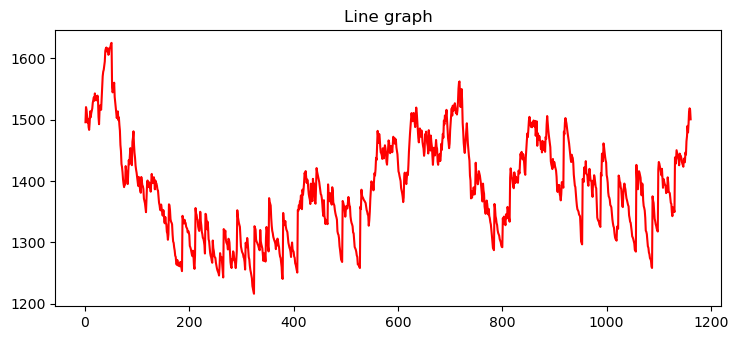

In [12]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

x = np.array(chist)

y=[]

for i in range(1,len(x)+1):
    y.append(i)

plt.title("Line graph")
plt.plot(y,x, color="red")

plt.show()

In [51]:
len(x)

1161

In [115]:
ry=[ '1950.0','1951.0','1952.0', '1953.0', '1954.0', '1955.0', '1956.0', '1957.0', '1958.0', '1959.0', '1960.0', '1961.0', '1962.0', '1963.0', '1964.0', '1965.0', '1966.0', '1967.0', '1968.0', '1969.0', '1970.0', '1971.0', '1972.0', '1973.0', '1974.0', '1975.0', '1976.0', '1977.0', '1978.0', '1979.0', '1980.0', '1981.0', '1982.0', '1983.0', '1984.0', '1985.0', '1986.0', '1987.0', '1988.0', '1989.0', '1990.0', '1991.0', '1992.0', '1993.0', '1994.0', '1995.0', '1996.0', '1997.0', '1998.0', '1999.0', '2000.0', '2001.0', '2002.0', '2003.0', '2004.0', '2005.0', '2006.0', '2007.0', '2008.0', '2009.0', '2010.0', '2011.0', '2012.0', '2013.0', '2014.0', '2015.0', '2016.0', '2017.0', '2018.0', '2019.0', '2020.0', '2021.0', '2022.0']
ryz=[ '1949.0','1950.0','1951.0','1952.0', '1953.0', '1954.0', '1955.0', '1956.0', '1957.0', '1958.0', '1959.0', '1960.0', '1961.0', '1962.0', '1963.0', '1964.0', '1965.0', '1966.0', '1967.0', '1968.0', '1969.0', '1970.0', '1971.0', '1972.0', '1973.0', '1974.0', '1975.0', '1976.0', '1977.0', '1978.0', '1979.0', '1980.0', '1981.0', '1982.0', '1983.0', '1984.0', '1985.0', '1986.0', '1987.0', '1988.0', '1989.0', '1990.0', '1991.0', '1992.0', '1993.0', '1994.0', '1995.0', '1996.0', '1997.0', '1998.0', '1999.0', '2000.0', '2001.0', '2002.0', '2003.0', '2004.0', '2005.0', '2006.0', '2007.0', '2008.0', '2009.0', '2010.0', '2011.0', '2012.0', '2013.0', '2014.0', '2015.0', '2016.0', '2017.0', '2018.0', '2019.0', '2020.0', '2021.0', '2022.0']
years={}

for i in ryz:
    years[i]={}
for i in ry:
    g=tdsz[i]
    for key in g:
        g[key]=g[key]['pre']
    e={k: v for k, v in sorted(g.items(), key=lambda item: item[1],reverse=False)[:1]}
    h=float(i)
    h=h-1
    
    if(h<1949):
        h=float(h)
    else:
        h=str(h)
    for key in e:
        years[h][key]=g[key]

In [32]:
#accuracy with hfa of 100 and k of 20 and playoff of 1.25
print(100/(w+l)*w)

69.46184561213964


In [38]:
eloLeague.ratingDict['Chicago State']

1607.7368316771344

In [30]:
tdsz['2022.0']['Chicago State']

{'pre': 1314.0205137458536, 'after': 1404.7580031241857}

In [ ]:
ridge msqe:474.3868630647837
linear regression msqe:474.3868630647724
ridge cv msqe:474.38688655158273
lasso lars:478.01469808018743
TweedieRegressor:474.3868688190748
lasso:474.3882378962286
lgbm:458.1403846902927
BayesianRidge:474.386948124353
cat boost:457.3066926084915

In [ ]:

letters=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
for letter in letters:
    print("g['at']=g['at'].str.replace('"+str(letter)+" St',"+"'"+str(letter)+" State')")

In [ ]:
from datetime import date
today=date.today()
from sklearn.linear_model import *
from sklearn.kernel_ridge import *
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import *
from sklearn.tree import *
from xgboost.sklearn import XGBRegressor
X_train, X_test, y_train, y_test = train_test_split(
otax,otay, test_size=0.33, random_state=42)
from catboost import CatBoostRegressor
log=CatBoostRegressor(logging_level='Silent').fit(X_train,y_train)
import numpy as np
from sklearn.metrics import mean_squared_error

mean_squared_error(log.predict(X_test), y_test)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
otm=LinearRegression().fit(otmx,otamy)

print("<div>")
url="https://www.sports-reference.com/cbb/boxscores/index.cgi?month=3&day=12&year=2023"
import requests
from bs4 import BeautifulSoup
html=requests.get(url).text
s=str(html)
s=s.encode("ascii",errors='replace')
s=s.decode("ascii",errors='replace')
soup=BeautifulSoup(s)
tables=soup.find_all("table",{"class":"teams"})

i=0
a=[]
today=str(today)
today=today.replace("-","")
import requests
import asyncio
global table
global w
global content

import pandas as pd
y={}
e="https://site.api.espn.com/apis/site/v2/sports/basketball/mens-college-basketball/scoreboard?dates="+str(20230315)+"&groups=50&limit=363&seasonType=3"
html=requests.get(e)
jsonz=html.json()

events=jsonz['events']
d=[]

for idz in events:
    teams=idz['name']
    teamss=str(teams)
    teams=teamss.split("at")
    ht=teams[1]
    at=teams[0]
    competitions=idz['competitions']
    
    competitors=idz['competitions'][0]['competitors']
    
    c=idz['competitions'][0]
    hn=competitors[0]['team']['shortDisplayName']
    an=competitors[1]['team']['shortDisplayName']
    n=c['neutralSite']
    hts=competitors[0]['score']
    ats=competitors[1]['score']
    active=competitors[1]['team']['isActive']
    status=idz['status']
    completed=status['type']['completed']
    if(1==1):
        st=status['type']['detail']
        st=str(st)
        st=st.replace("[","")
        stt=st.replace("]","")
        stt=stt
        st=stt.split("at")
        if ("at" in stt):
            st=st[1]
        if ("at" not in stt):
            st=stt
        if("Final") in stt:
            r="Final"
        if("Final") not in stt:
            r="Start Time:"+str(st)
        hn=str(hn)
        an=str(an)
        d.append([hn,an,n])
for table in tables:
    if "Men's" in str(table):
        links=table.find_all("a")
        a.append([links[0].text,links[1].text])
    
df = pd.DataFrame(a, columns=['Away','Home'])
df=df.replace("UC-San Diego","UC San Diego")
df=df.replace("LSU","Louisiana State")
df=df.replace("ETSU","East Tennessee State")
df=df.replace("VMI","Virginia Military Institute")
df=df.replace("St. ","Saint ")
df=df.replace("SMU",'Southern Methodist')
df=df.replace('UC-Davis','UC Davis')
df=df.replace("Penn","Pennsylvania")
df=df.replace("Ole Miss","Mississippi")
df=df.replace("St. Peter's","Saint Peter's")
df=df.replace("BYU","Brigham Young")
df=df.replace('UC-Riverside','UC Riverside')
df=df.replace("Saint Mary's","Saint Mary's (CA)")
df=df.replace("UNC","North Carolina")
df=df.replace("St. Joseph's","Saint Joseph's")
df=df.replace("UNLV","Nevada-Las Vegas")
df=df.replace("UC-Irvine","UC Irvine")
df=df.replace("UMass Lowell","Massachusetts-Lowell")
df=df.replace("UMass","Massachusetts")
df=df.replace("UConn","Connecticut")
df=df.replace("UCSB","UC Santa Barbara")
df=df.replace("USC","Southern California")
df=df.replace("UMass","Massachusetts")
df=df.replace("UIC","Illinois-Chicago")
df=df.replace("LIU",'Long Island University')
df=df.replace("SIU-Edwardsville","Southern Illinois-Edwardsville")
df=df.replace("USC Upstate","South Carolina Upstate")
df=df.replace("Central Connecticut","Central Connecticut State")
df=df.replace("UMBC","Maryland-Baltimore County")
df=df.replace("Southern Miss","Southern Mississippi")
df=df.replace("UT-Martin","Tennessee-Martin")
df=df.replace("Pitt","Pittsburgh")
df=df.replace("UCF","Central Florida")
df=df.replace("Detroit","Detroit Mercy")
df=df.replace("VCU",'Virginia Commonwealth')

url="https://www.sports-reference.com/cbb/boxscores/index.cgi?month=3&day=13&year=2023"
import requests
from bs4 import BeautifulSoup
html=requests.get(url).text
s=str(html)
s=s.encode("ascii",errors='replace')
s=s.decode("ascii",errors='replace')
soup=BeautifulSoup(s)
a=[]
tables=soup.find_all("table",{"class":"teams"})
for table in tables:
    if "Men's" in str(table):
        links=table.find_all("a")
        a.append([links[0].text,links[1].text])
    
df1 = pd.DataFrame(a, columns=['Away','Home'])
df1=df1.replace("UC-San Diego","UC San Diego")
df1=df1.replace("LSU","Louisiana State")

df1=df1.replace("ETSU","East Tennessee State")
df1=df1.replace("VMI","Virginia Military Institute")
df1=df1.replace("St. ","Saint ")
df1=df1.replace("SMU",'Southern Methodist')
df1=df1.replace('UC-Davis','UC Davis')
df1=df1.replace("Penn","Pennsylvania")
df1=df1.replace("Ole Miss","Mississippi")
df1=df1.replace("St. Peter's","Saint Peter's")
df1=df1.replace("BYU","Brigham Young")
df1=df1.replace('UC-Riverside','UC Riverside')
df1=df1.replace("Saint Mary's","Saint Mary's (CA)")
df1=df1.replace("UNC","North Carolina")
df1=df1.replace("St. Joseph's","Saint Joseph's")
df1=df1.replace("UNLV","Nevada-Las Vegas")
df1=df1.replace("UC-Irvine","UC Irvine")
df1=df1.replace("UMass-Lowell","Massachusetts-Lowell")
df1=df1.replace("UMass","Massachusetts")
df1=df1.replace("UConn","Connecticut")
df1=df1.replace("UCSB","UC Santa Barbara")
df1=df1.replace("USC","Southern California")
df1=df1.replace("UMass","Massachusetts")
df1=df1.replace("UIC","Illinois-Chicago")
df1=df1.replace("LIU",'Long Island University')
df1=df1.replace("SIU-Edwardsville","Southern Illinois-Edwardsville")
df1=df1.replace("USC Upstate","South Carolina Upstate")
df1=df1.replace("Central Connecticut","Central Connecticut State")
df1=df1.replace("UMBC","Maryland-Baltimore County")
df1=df1.replace("Southern Miss","Southern Mississippi")
df1=df1.replace("UT-Martin","Tennessee-Martin")
df1=df1.replace("Pitt","Pittsburgh")
df1=df1.replace("UCF","Central Florida")
df1=df1.replace("Detroit","Detroit Mercy")
df1=df1.replace("VCU",'Virginia Commonwealth')
tot=set(df1.Home.tolist()+df1.Away.tolist())
tt=set(df.Home.tolist()+df.Away.tolist())
for team in tt:
    if team in tot:
        print("teams playing today and tomorrow",team)
g=pd.DataFrame(d,columns=['ht','at','n'])




g= g.astype({'ht':'string','at':'string'})
g['at']=g['at'].str.replace('a St','a State')
g['at']=g['at'].str.replace('b St','b State')
g['at']=g['at'].str.replace('c St','c State')
g['ht']=g['ht'].str.replace("Loyola MD","Loyola (MD)")
g['at']=g['at'].str.replace("Loyola MD","Loyola (MD)")
g['ht']=g['ht'].str.replace("Loyola IL","Loyola (IL)")
g['at']=g['at'].str.replace("Loyola IL","Loyola (IL)")
g['at']=g['at'].str.replace('d St','d State')
g['at']=g['at'].str.replace('e St','e State')
g['at']=g['at'].str.replace('f St','f State')
g['at']=g['at'].str.replace('g St','g State')
g['at']=g['at'].str.replace('h St','h State')
g['at']=g['at'].str.replace('i St','i State')
g['at']=g['at'].str.replace('j St','j State')
g['at']=g['at'].str.replace('k St','k State')
g['ht']=g['ht'].str.replace("E Kentucky","Eastern Kentucky")
g['at']=g['at'].str.replace("E Kentucky","Eastern Kentucky")
g['ht']=g['ht'].str.replace("Purdue FW","Purdue-Fort Wayne")
g['at']=g['at'].str.replace("Purdue FW","Purdue-Fort wayne")
g['ht']=g['ht'].str.replace("Queens","Queens (NC)")
g['at']=g['at'].str.replace("Queens","Queens (NC)")
g['ht']=g['ht'].str.replace("C Michigan","Central Michigan")
g['at']=g['at'].str.replace("C Michigan","Central Michigan")
g['ht']=g['ht'].str.replace("E Michigan","Eastern Michigan")
g['at']=g['at'].str.replace("E Michigan","Eastern Michigan")
g['ht']=g['ht'].str.replace("W Michigan","Western Michigan")
g['at']=g['at'].str.replace("W Michigan","Western Michigan")
g['ht']=g['ht'].str.replace("UMBC","Maryland-Baltimore County")
g['at']=g['at'].str.replace("UMBC","Maryland-Baltimore County")
g['ht']=g['ht'].str.replace("VCU","Virginia Commonwealth")
g['at']=g['at'].str.replace("VCU","Virginia Commonwealth")
g['at']=g['at'].str.replace('l St','l State')
g['at']=g['at'].str.replace('m St','m State')
g['at']=g['at'].str.replace('n St','n State')
g['at']=g['at'].str.replace('o St','o State')
g['at']=g['at'].str.replace('p St','p State')
g['at']=g['at'].str.replace('q St','q State')
g['at']=g['at'].str.replace('r St','r State')
g['at']=g['at'].str.replace('s St','s State')
g['at']=g['at'].str.replace('t St','t State')
g['at']=g['at'].str.replace('u St','u State')
g['at']=g['at'].str.replace('v St','v State')
g['at']=g['at'].str.replace('w St','w State')
g['at']=g['at'].str.replace('x St','x State')
g['at']=g['at'].str.replace('y St','y State')
g['at']=g['at'].str.replace('z St','z State')
g['ht']=g.ht.str.replace('a St','a State')
g['ht']=g.ht.str.replace('b St','b State')
g=g.replace("UMass Lowell","UMass-Lowell")
g['ht']=g.ht.str.replace('c St','c State')
g['ht']=g.ht.str.replace('d St','d State')
g['ht']=g.ht.str.replace('e St','e State')
g['ht']=g.ht.str.replace('f St','f State')
g['ht']=g.ht.str.replace('g St','g State')
g['ht']=g.ht.str.replace('h St','h State')
g['ht']=g.ht.str.replace('i St','i State')
g['ht']=g.ht.str.replace('j St','j State')
g['ht']=g.ht.str.replace('k St','k State')
g['ht']=g.ht.str.replace('l St','l State')
g['ht']=g.ht.str.replace('m St','m State')
g['ht']=g.ht.str.replace('n St','n State')
g['ht']=g.ht.str.replace('o St','o State')
g['ht']=g.ht.str.replace('p St','p State')
g['ht']=g.ht.str.replace('q St','q State')
g['ht']=g.ht.str.replace('r St','r State')
g['ht']=g.ht.str.replace('s St','s State')
g=g.replace("Penn Stateate","Penn State")
g=g.replace("UCF","Central Florida")
g=g.replace("SMU","Southern Methodist")
g=g.replace("W Carolina","Western Carolina")
g['ht']=g.ht.str.replace('t St','t State')
g['ht']=g.ht.str.replace('u St','u State')
g['ht']=g.ht.str.replace('v St','v State')
g['ht']=g.ht.str.replace('w St','w State')
g['ht']=g.ht.str.replace('x St','x State')
g=g.replace("UMass-Lowell","Massachusetts-Lowell")
g['ht']=g.ht.str.replace('y St','y State')
g['ht']=g.ht.str.replace('z St','z State')
g=g.replace("McNeese","McNeese State")
g=g.replace("Georgia So","Georgia Southern")
g=g.replace("LMU","Loyola Marymount")
g=g.replace("BYU","Brigham Young")
g=g.replace("Hawai'i",'Hawaii')
g=g.replace("N Kentucky","Northern Kentucky")
g=g.replace("N Dakota State","Northern Dakota State")
g=g.replace("S Dakota State","South Dakota State")
g=g.replace("UCSB","UC Santa Barbara")
g=g.replace("N Colorado","Northern Colorado")
g=g.replace("Loyola Chicago","Loyola (IL)")
g=g.replace("Iowa Stateate","Iowa State")
g=g.replace("Miami","Miami (FL)")
g=g.replace("St John's","St. John's (NY)")
g=g.replace("Hou Christian","Houston Christian")
g=g.replace("Nicholls",'Nicholls State')
g=g.replace("SE Louisiana","Southeastern Louisiana")
g=g.replace("SE Missouri State","Southeast Missouri State")
g=g.replace("Pitt",'Pittsburgh')
g=g.replace("Charleston So","Charleston Southern")
g=g.replace("G Washington",'George Washington')
g=g.replace("Fair Dickinson","Fairleigh Dickinson")
g=g.replace("C Connecticut","Central Connecticut State")
g=g.replace("St Francis BK","St. Francis (NY)")
g=g.replace("San José St","San Jose State")
g=g.replace("St Francis PA","St. Francis (PA)")
g=g.replace("Abilene Chrstn","Abilene Christian")
g=g.replace("Ohio Stateate","Ohio State")
g=g.replace("UConn","Connecticut")
g=g.replace("Saint Mary's","Saint Mary's (CA)")
g=g.replace("UMass","Massachusetts")
g=g.replace("Coast Car",'Coastal Carolina')
g=g.replace("Texas A&M-Comm","Texas A&M-Commerce")
g=g.replace("E Washington","Eastern Washington")
g=g.replace("W Carolina",'Western Carolina')
g=g.replace("Charleston","College of Charleston")
g=g.replace("N Arizona",'Northern Arizona')
g=g.replace("UCF","Central Florida")
g=g.replace("Tarleton","Tarleton State")
g=g.replace("UT Rio Grande","Texas-Rio Grande Valley")
g=g.replace("CA Baptist","California Baptist")
g=g.replace("CSU Northridge","Cal State Northridge")
g=g.replace("N'Western State","Northwestern State")
g=g.replace("SF Austin","Stephen F. Austin")
g=g.replace("SMU",'Southern Methodist')
g=g.replace("W Illinois",'Western Illinois')
g=g.replace("St Thomas","St Thomas(MN)")
g=g.replace("FIU","Florida International")
g=g.replace("Bethune","Bethune-Cookman")
g=g.replace("LSU","Louisiana State")
g=g.replace("FIU","Florida International")
g=g.replace("Bethune","Bethune-Cookman")
g=g.replace("LSU","Louisiana State")
g=g.replace("Massachusetts-Lowell","UMass-Lowell")
g=g.replace("UMass-Lowell","Massachusetts-Lowell")
g=g.replace("Mount State Mary","Mount St. Mary's")
g=g.replace("Texas A&M-CC","Texas A&M-Corpus Christi")
g=g.replace("Penn Stateate","Penn State")
g=g.replace("Bakersfield","Cal State Bakersfield")
g=g.replace("UNLV","Nevada-Las Vegas")
g=g.replace("Western KY","Western Kentucky")
g=g.replace("UTEP","UTEP")
g=g.replace("NC Central","North Carolina Central")
df=df.replace("UMass-Lowell","Massachusetts-Lowell")
g=g.replace("FAU","Florida Atlantic")
g=g.replace("Miami OH","Miami (OH)")
g=g.replace("Fullerton","Cal State Fullerton")
g=g.replace("N Illinois","Northern Illinois")
g=g.replace("Seattle U","Seattle")
g=g.replace("MTSU","Middle Tennessee")
g=g.replace("USC","Southern California")
g=g.replace("MD-Eastern","Maryland-Eastern Shore")
g=g.replace("Ball Stateate","Ball State")
g=g.replace("Sam Houston","Sam Houston State")
g=g.replace("Ole Miss","Mississippi")
g=g.replace("Utah Stateate","Utah State")
g['ht']=g['ht'].str.replace("Stateate","State")
g['at']=g['at'].str.replace("Stateate","State")
g=g.replace("Kent Stateate","Kent State")
g=g.replace("St. Francis (PA)","Saint Francis (PA)")
g=g.replace("Miss Valley State","Mississippi Valley State")
g=g.replace("AR-Pine Bluff","Arkansas-Pine Bluff")
g=g.replace("UT Martin","Tennessee-Martin")
g=g.replace("S Illinois","Southern Illinois")
g=g.replace("SC Upstate","South Carolina Upstate")
g=g.replace("NC A&T","North Carolina A&T")
g=g.replace("Southern Miss","Southern Mississippi")
g=g.replace("Northern Dakota State","North Dakota State")
g=g.replace("So Indiana","Southern Indiana")
g=g.replace("Long Island","Long Island University")
g=g.replace("UL Monroe","Louisiana-Monroe")
g=g.replace("UIC","Illinois-Chicago")
g=g.replace("Boston Univ","Boston University")
g=g.replace("Bowling Green","Bowling Green State")
g=g.replace("VMI","Virginia Military Institute")
g=g.replace("FAMU","Florida A&M")
g=g.replace("Penn","Pennsylvania")
g=g.replace("St Bonaventure","St. Bonaventure")
g=g.replace("ETSU","East Tennessee State")
g=g.replace("St Thomas (MN)","St. Thomas")
g=g.replace("SC State","South Carolina State")
import string
g=g.rename(columns={'ht':'Home','at':'Away','n':'neutral'})
mas= min(zip(msqe.values(), msqe.keys()))[1]
mas=float(mas)
for letter in list(string.ascii_lowercase):
    string=letter+" St"
    rstring=letter+" State"
    g=g.replace(string,rstring)
for row in g.itertuples():
    if row.Away not in eloLeague.ratingDict.keys():
        eloLeague.addPlayer(row.Away,rating=1500)
        print(row.Away+"don't exist")
    if row.Home not in eloLeague.ratingDict.keys():
        eloLeague.addPlayer(row.Home,rating=1500)
        print(row.Home+"don't exist")
    if row.Away in eloLeague.ratingDict.keys() and row.Home in eloLeague.ratingDict.keys():
        
        
        hr=eloLeague.ratingDict[row.Home]+100
        n=row.neutral
        
        
        if( 'True' in str(n)):
            
            hr=eloLeague.ratingDict[row.Home]
        if( 'True' not in str(n)):
            hr=eloLeague.ratingDict[row.Home]+100
        
    
        ar=eloLeague.ratingDict[row.Away]
    
        spread=abs(hr-ar)/mas
        spread=round(spread)
        if(spread==0):
            spread=1
        elodiff=abs(hr-ar)
        arr=np.array([hr,ar,elodiff,spread,row.neutral])
        arr=arr.reshape(-5,5)
        ou=log.predict(arr)
        ou = [np.round(x) for x in ou]
        ou=str(ou)
        ou=ou.replace("[","")
        ou=ou.replace("]","")
        ou=float(ou)
        exd2=ou/2
        spreadz=round(spread/2)
        if(hr>ar):
            t1s=exd2+spreadz
            t2s=exd2-spreadz
        if(hr<ar):
            t1s=exd2-spreadz
            t2s=exd2+spreadz
        ou=str(ou)
        ou=ou.replace("[","")
        ou=ou.replace("]","")
        elod=abs(hr-ar)
        otp=1/(1+math.e**(-1*(-1.1320032+(-0.0009822*elod))))
        otp=otp*100
        otp=str(otp)
        otp=otp+"%"
        k=str(hr)+str(ar)
        if hr>ar and "TBD" not in k:
            prob=1/((10**((ar-hr)/400))+1)
            prob=prob*100
            print(row.Home+" has a "+str(prob)+"% chance of beating "+row.Away+" and will win by "+str(spread)+".The teams will score a combined "+str(ou)+" points."+"The game has a "+str(otp)+" of going into overtime.<br/>")
        if hr<ar and "TBD" not in k:
            prob=1/((10**((hr-ar)/400))+1)
            prob=prob*100
            print(row.Away+" has a "+str(prob)+"% chance of beating "+row.Home+" and will win by "+str(spread)+".The teams will score a combined "+str(ou)+" points."+"The game has a "+str(otp)+" of going into overtime.<br/>")
        
print("</div>")

In [ ]:
nid=[]
for team in set(oldconfs.School.tolist()):
    if team not in set(df22.Schl.tolist()):
        nid.append(team)

In [ ]:
elodiff=eloLeague.ratingDict['Houston']-eloLeague.ratingDict['Alabama']
k=np.array([eloLeague.ratingDict['Houston'],eloLeague.ratingDict['Alabama'],elodiff,1,0])
log.predict(k)

In [ ]:
e={k: v for k, v in sorted(eloLeague.ratingDict.items(), key=lambda item: item[1],reverse=True)[:25]}
t=1
for key in e:
    print(str(t)+"."+key+"(elo:"+str(eloLeague.ratingDict[key])+")<br/>")
    t+=1

In [ ]:
tyconf=confdf[confdf.Year==2022]
tyconf=tyconf.dropna()
atlconf=tyconf[tyconf.Conf=="Atlantic 10 Conference"]
confz={}
for key in tyconf.Conf.unique():
    confz[key]={}
    u=tyconf[tyconf.Conf==key]
    o={}
    for row in u.itertuples():
        
        
        o[row.School]=eloLeague.ratingDict[row.School]
    e={k: v for k, v in sorted(o.items(), key=lambda item: item[1],reverse=True)[:1]}
    for d in e.keys():
        confz[key]=d
        print(key,":",d,"<br/>")
        
        
        
        

In [ ]:
import pandas as pd
arr=[]
proxies={'http':'103.197.251.202:80'}

from bs4 import BeautifulSoup,Comment
import time
for year in range(1915,2024):
    import requests
    time.sleep(2)
    page="https://www.sports-reference.com/cbb/seasons/"+str(year)+"-standings.html"
    html=requests.get(page)
    ts=BeautifulSoup(html.text)
    tables=pd.read_html("\n".join(ts.find_all(text=Comment)))
    lt=len(tables)
    
    links=ts.find_all("span",{'class':'section_anchor'})
    for i in range(0,lt+1):
        num=i-1
        t=links[num]['data-label']
        df=pd.read_html("\n".join(ts.find_all(text=Comment)))[num]
        df.columns = df.columns.droplevel()
        
        df['Conf']=t
        df=df
        df['Year']=year-1
        if year>1948:
            df.columns=['Rk', 'School', 'Conf', 'W', 'L', 'W-L%', 'Unnamed: 6_level_1', 'W',
       'L', 'W-L%', 'Unnamed: 10_level_1', 'Unnamed: 11_level_1',
       'Unnamed: 12_level_1', 'AP Pre', 'AP High', 'AP Final',
       'Unnamed: 16_level_1', 'Notes', 'Year']
        else:
            
            df.columns = ['Rk', 'School', 'Conf', 'W', 'L', 'W-L%', 'Unnamed: 6_level_1', 'WC',
       'LC', 'W-L%', 'Unnamed: 10_level_1', 'Unnamed: 11_level_1',
       'Unnamed: 12_level_1', 'Unnamed: 13_level_1', 'Notes', 'Year']

        arr.append(pd.DataFrame(df))
    print(year)
    time.sleep(2)